### This notebook actually calculates a representative subsample of GBS. ROC Curves are therefore combined with increasing brightness to demonstrate the progress.

In [41]:
from pathlib import Path
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

path = Path(os.getcwd()).parent

#this method tries to assess the performance of the pu learning method. it takes the puAUC and estimates the actual AUC.
def puROC(auc, pos):
    return (auc - pos/2)/(1-pos)


# this might seem a little confusing: 
#puAUC is the calculated AUC for the binary classification setting. The positive unlabeled setting AUC is AUC.
def roc(y_test, preds, iteration, name):
    alpha = min(iteration+0.2,0.8)
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    #plt.title('Iteration: '+ str(name))
    plt.figure(figsize=(12,8))
    label = 'puAUC = %0.2f' % roc_auc + '\n AUC = %0.2f' % puROC(roc_auc, 0.29)
    plt.plot(fpr, tpr, 'black', label = label, alpha=alpha)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'k--', alpha=alpha)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig(os.path.join(path, 'tex/fig/roc/'+str(name)+'.png'))
    plt.show()
    return roc_auc

In [42]:
gbs = pd.read_csv(os.path.join(path, 'data/gbs_processed.csv'), encoding = "ISO-8859-1", delimiter = ',')
gesis = pd.read_csv(os.path.join(path, 'data/gesis_processed.csv'), encoding = "ISO-8859-1", delimiter = ',')

gbs = gbs.fillna(gbs.median())
gesis = gesis.fillna(gesis.median())

gbs['Umfrage'] = 1
gesis['Umfrage'] = 0

In [43]:
gesis.drop(columns = ['GESIS-CODE'], axis=1, inplace = True)
gbs.drop(columns = ['GBS-CODE', 'Gruppe'], axis=1, inplace = True)

drop = ['Personen im Haushalt', 'Druck', 'Optimismus Zukunft', 'Geburtsland', 'Nationalitaet',
       'Familienstand', 'Hoechster Bildungsabschluss', 'Berufliche Ausbildung',
       'Berufsgruppe', 'Leben genießen', 'Zu Nichts aufraffen',
       'Alles anstrengend', 'Zufriedenheit Leben', 'Aktiv', 'Verärgert',
       'Zufriedenheit Wahlergebnis', 'Resilienz', 'Wach', 'Nervös', 'Ängstlich', 'Zurueckhaltend',
       'Nettoeinkommen Selbst', 'Nettoeinkommen Haushalt', 'Schlechter Schlaf',
       'Wahlabsicht', 'Desinteresse Politiker', 'Erwerbstaetigkeit', 'Geschlecht', 'Geburtsjahr', 'Wahlteilnahme']

gbs.drop(columns=drop, axis=1, inplace=True)
gesis.drop(columns=drop, axis=1, inplace=True)

gbs_base = gbs.copy()

[0.16772157 0.12338248 0.10451799 0.12214718 0.04917167 0.06173751
 0.06472357 0.15773246 0.14886557]


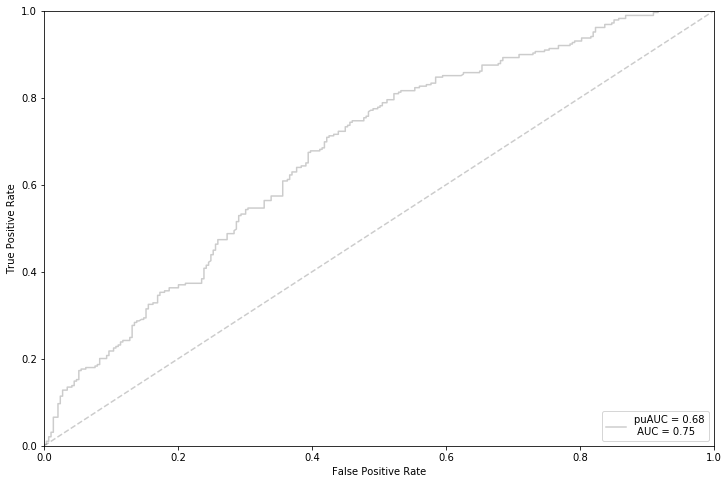

[0.27991687 0.16965388 0.07330677 0.09109715 0.04260715 0.04804993
 0.05740253 0.07545141 0.16251431]


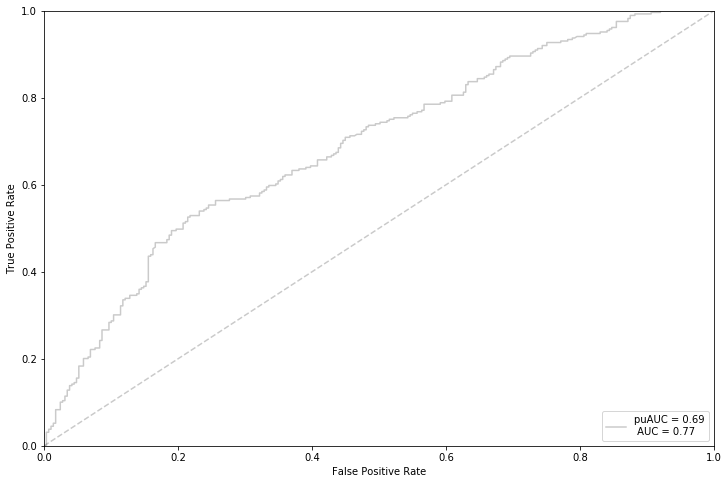

[0.16379113 0.12789591 0.10181757 0.10621137 0.07620866 0.06374521
 0.07927123 0.13345439 0.14760453]


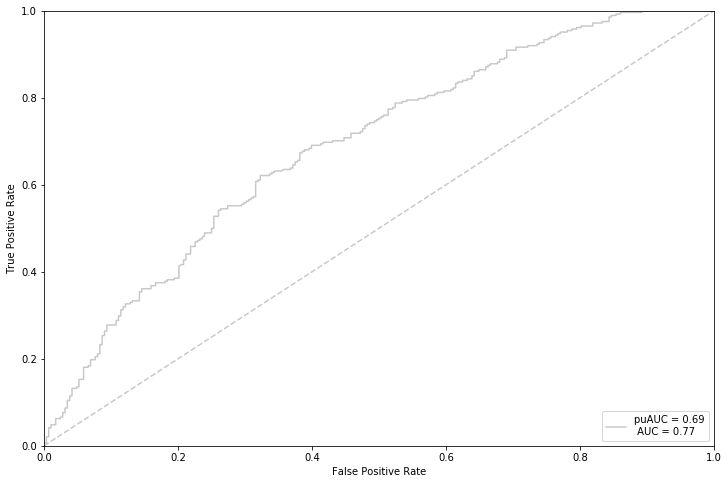

[0.22970332 0.09013183 0.1222724  0.10273231 0.05885417 0.0592855
 0.09200253 0.15684934 0.08816859]


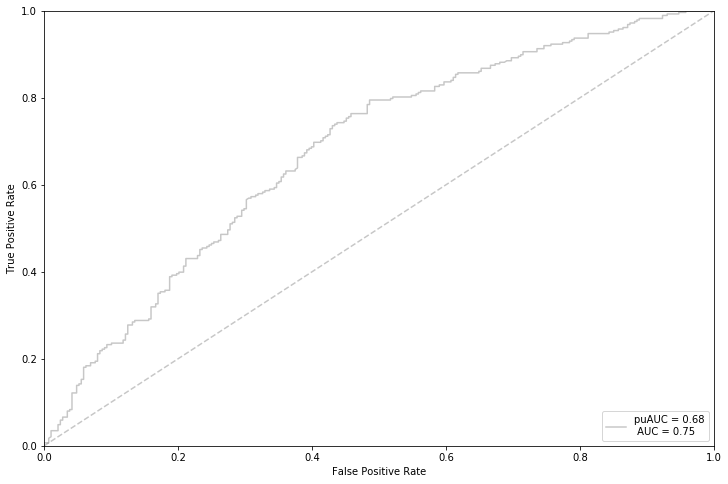

[0.27403801 0.09580159 0.13237114 0.07177023 0.07203232 0.05759834
 0.03712139 0.12639252 0.13287447]


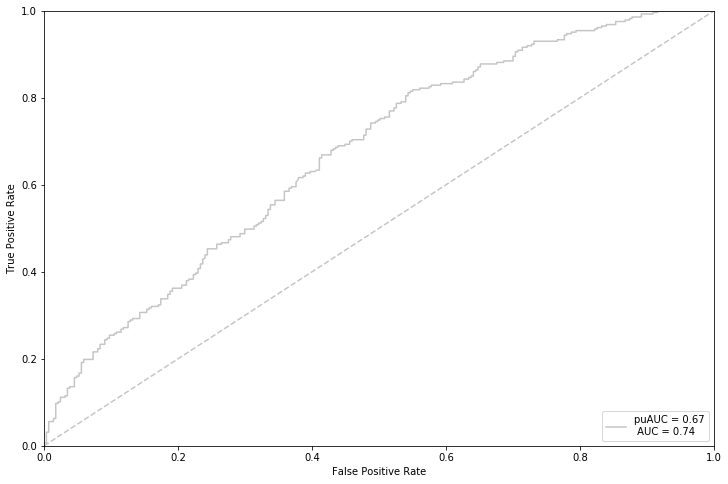

[0.1528486  0.1355506  0.06838522 0.12524512 0.07542448 0.08641902
 0.06366029 0.10914747 0.18331921]


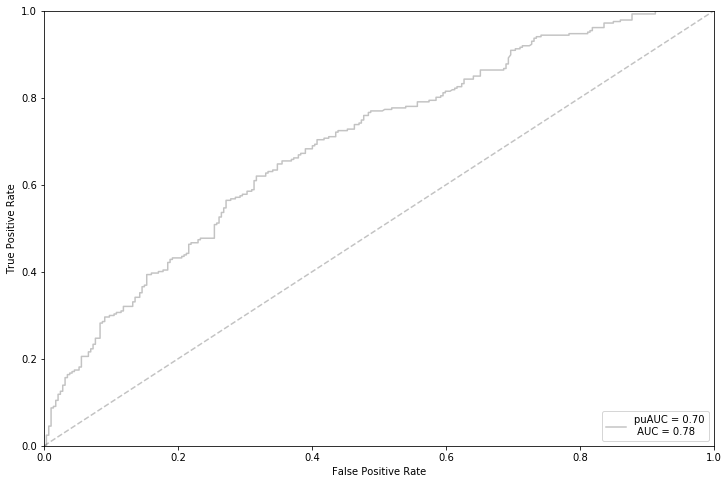

[0.13676155 0.10003796 0.12072516 0.16696121 0.06952205 0.05594539
 0.08186501 0.15118845 0.11699321]


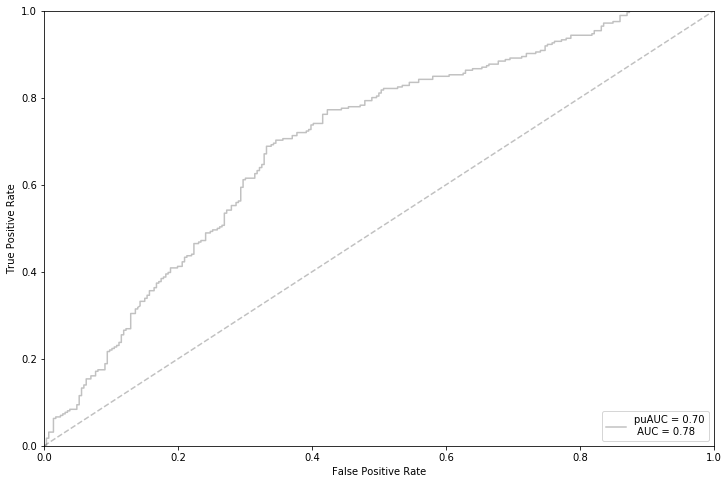

[0.26532856 0.1245057  0.0753883  0.08411358 0.07375396 0.05470589
 0.04817217 0.16505766 0.10897418]


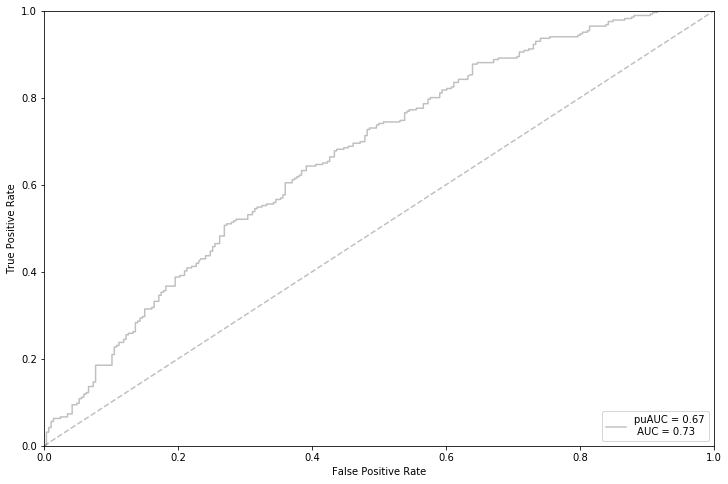

[0.22189939 0.13252261 0.08317938 0.13203477 0.05833757 0.05870793
 0.06745737 0.1356182  0.11024279]


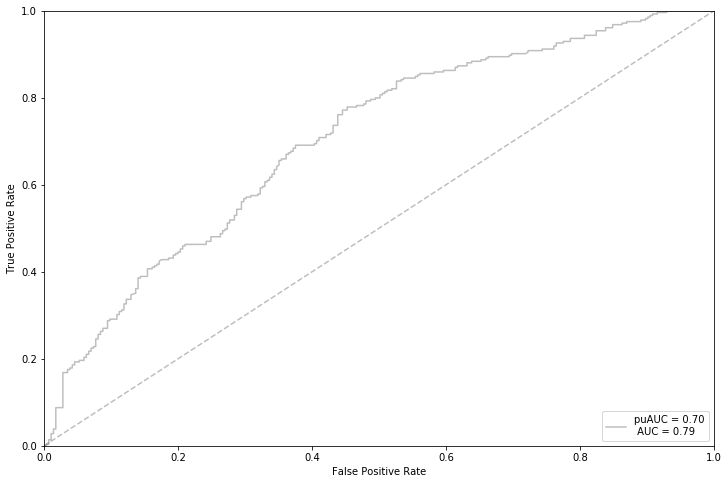

[0.28535538 0.10793901 0.07200873 0.0882648  0.05457657 0.0717848
 0.08376249 0.12290249 0.11340573]


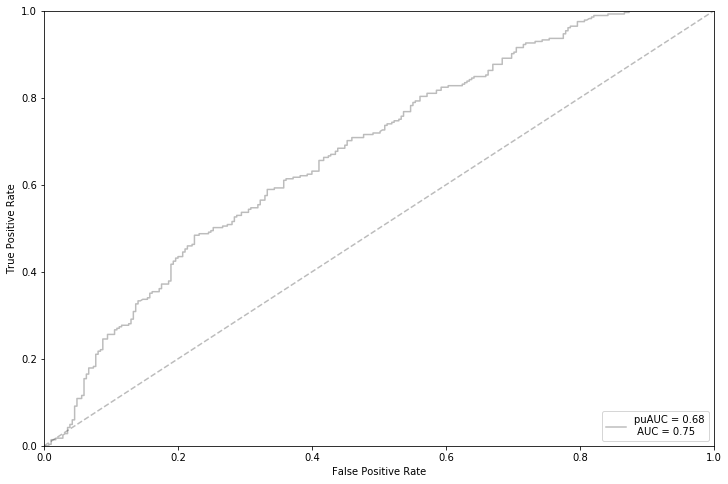

[0.22462132 0.09392196 0.0960057  0.15882502 0.06307158 0.07719202
 0.03888395 0.12762435 0.1198541 ]


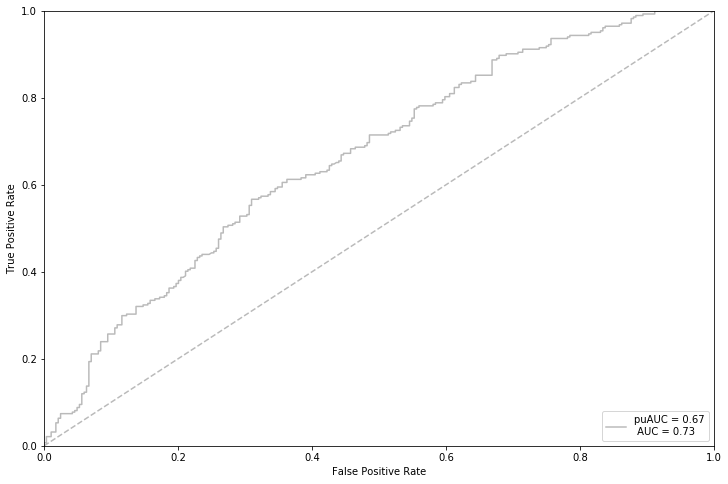

[0.22821488 0.12924365 0.11134196 0.08486016 0.05566178 0.06380042
 0.07631497 0.16026209 0.09030009]


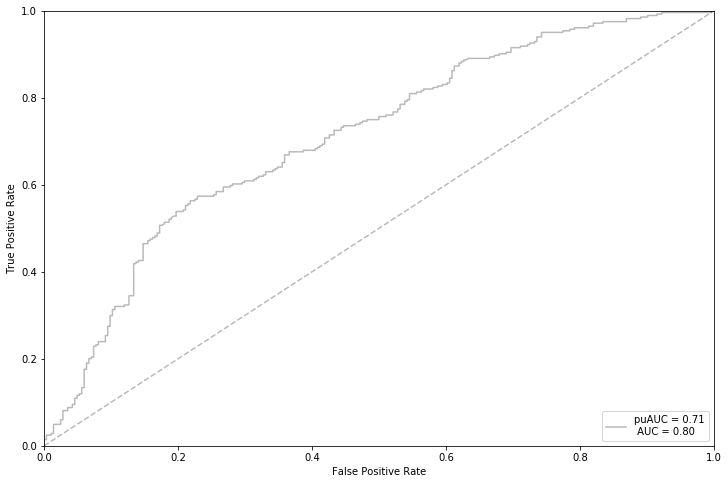

[0.17733468 0.11035911 0.12634715 0.1232273  0.05420725 0.09085571
 0.06386647 0.18182349 0.07197883]


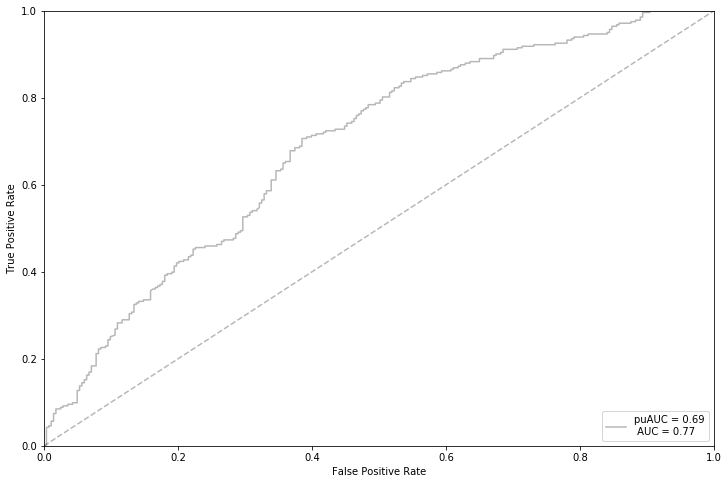

[0.15300042 0.11557206 0.09246809 0.17405229 0.05415476 0.06355658
 0.08554675 0.15970639 0.10194266]


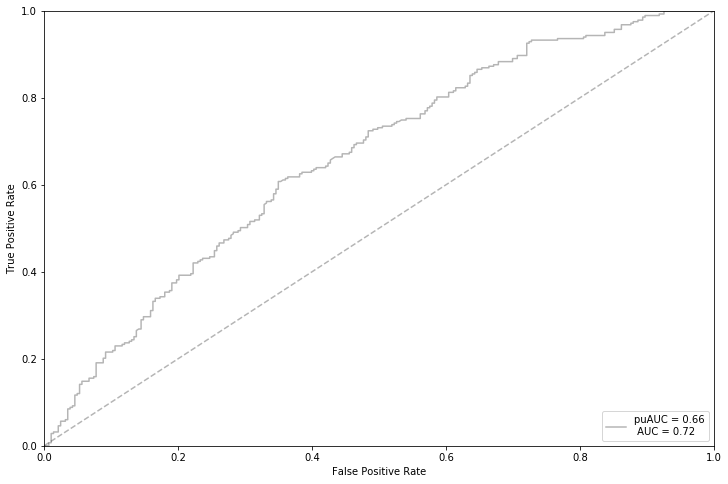

[0.18490208 0.17023943 0.09513789 0.11616537 0.08319862 0.0663649
 0.04650972 0.1560959  0.08138609]


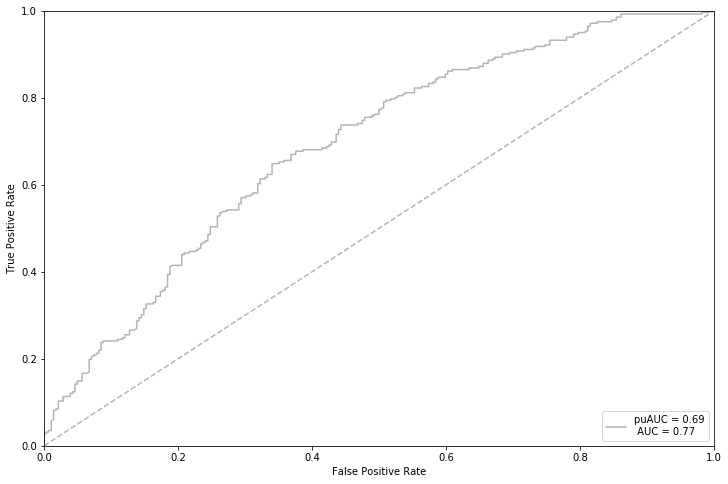

[0.19729233 0.12211474 0.15677221 0.11100436 0.05804293 0.05854098
 0.04101573 0.17778707 0.07742966]


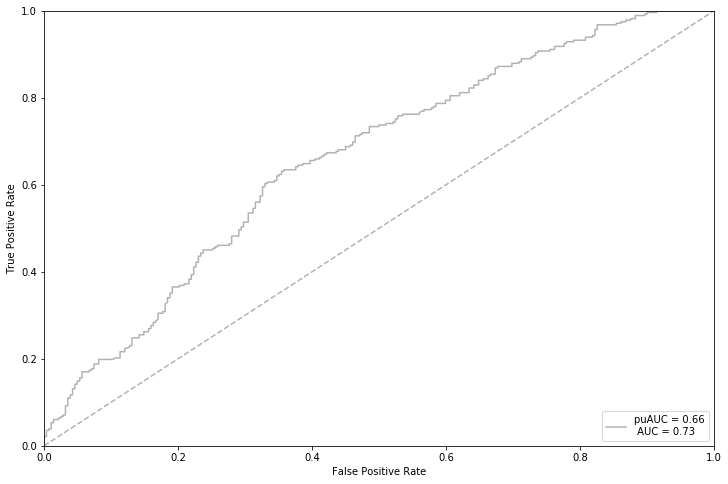

[0.2583541  0.12719421 0.08917022 0.10462103 0.07044957 0.04721563
 0.03917506 0.16750362 0.09631658]


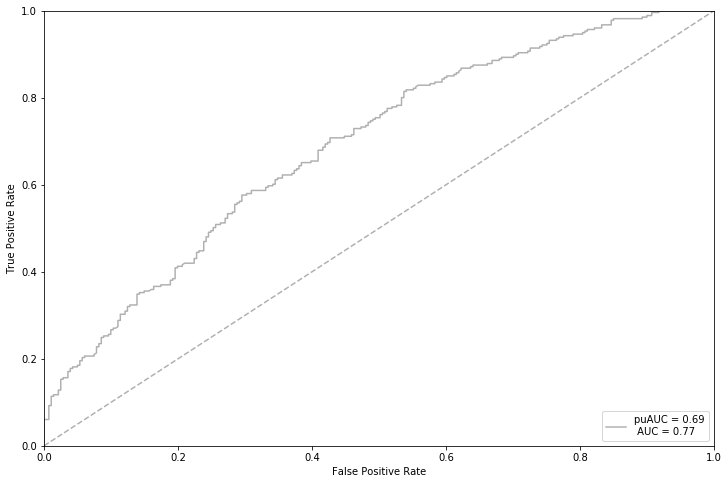

[0.10502    0.14656428 0.13999947 0.10440695 0.06110134 0.07080906
 0.07882457 0.17535418 0.11792016]


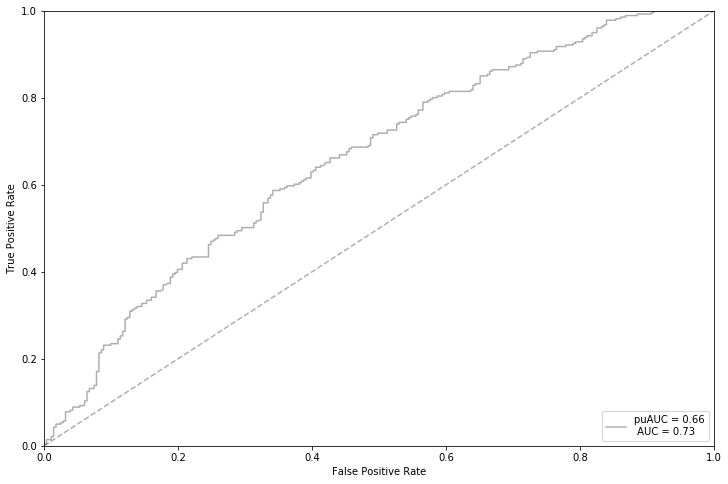

[0.14426281 0.11572471 0.07790132 0.17278413 0.08096119 0.07229815
 0.04956069 0.15672202 0.12978499]


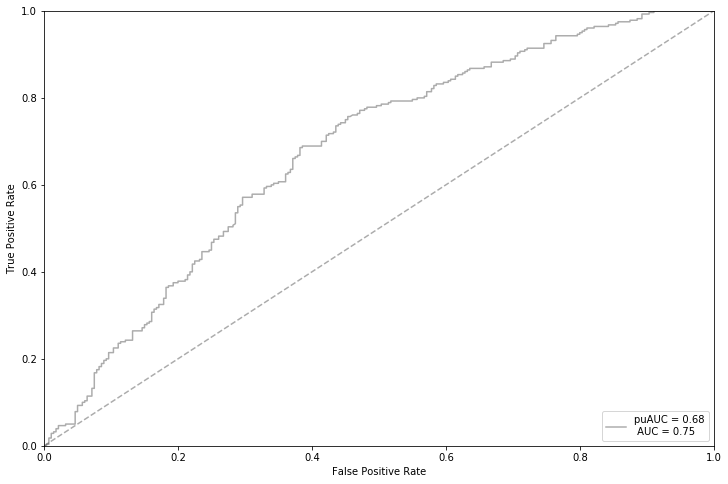

[0.19509972 0.11716561 0.08693982 0.108941   0.09096901 0.04969187
 0.06026279 0.13624302 0.15468716]


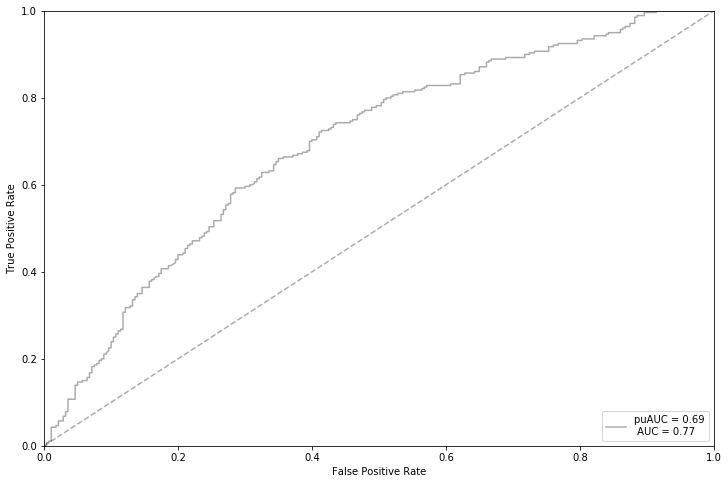

[0.21762048 0.15710369 0.09263048 0.10041034 0.05725587 0.08194258
 0.05107201 0.14760469 0.09435986]


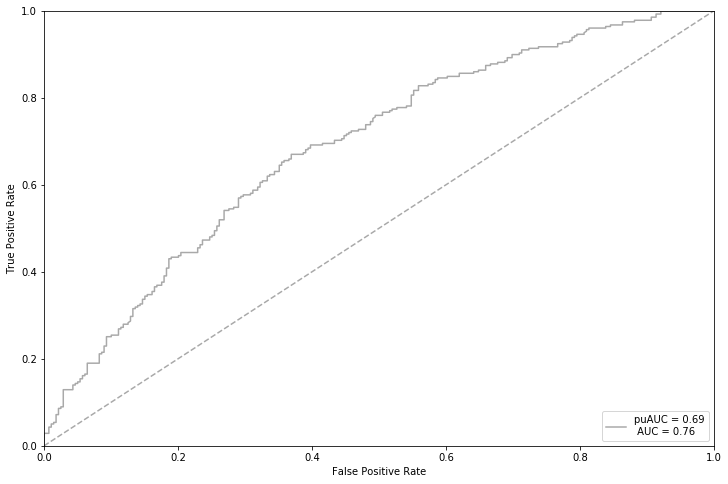

[0.16300205 0.11198956 0.07923802 0.17035692 0.08313468 0.05867772
 0.05731499 0.09948356 0.17680249]


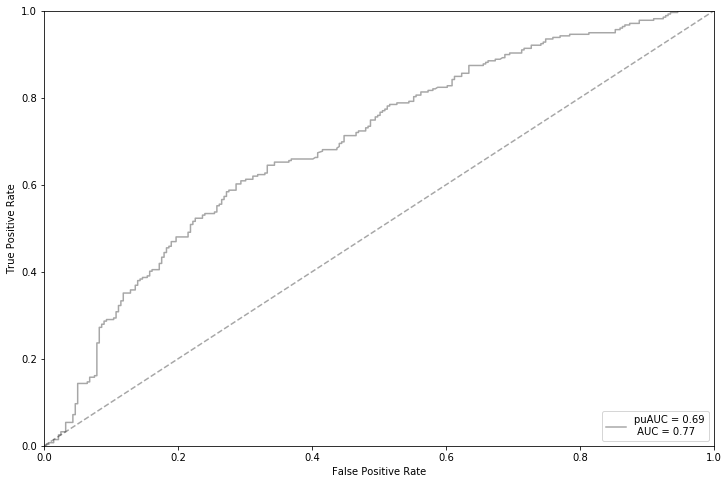

[0.19216575 0.0954063  0.11030295 0.1903603  0.07249197 0.06973419
 0.07225811 0.12032822 0.07695219]


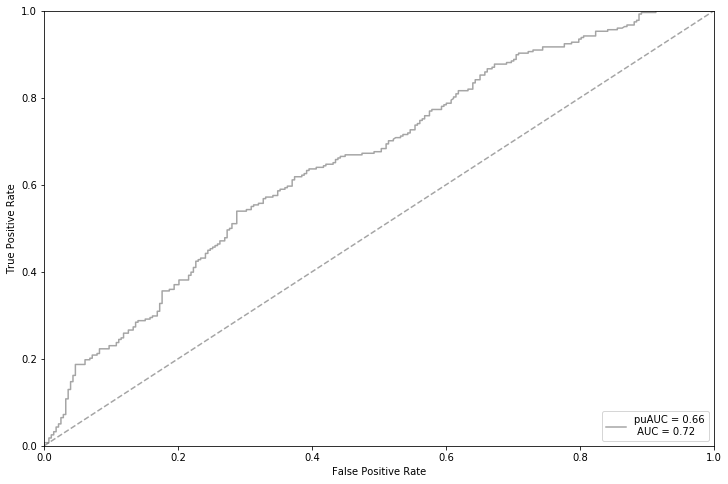

[0.34622889 0.07226788 0.08449095 0.08858548 0.05192329 0.06832374
 0.06382873 0.13455137 0.08979968]


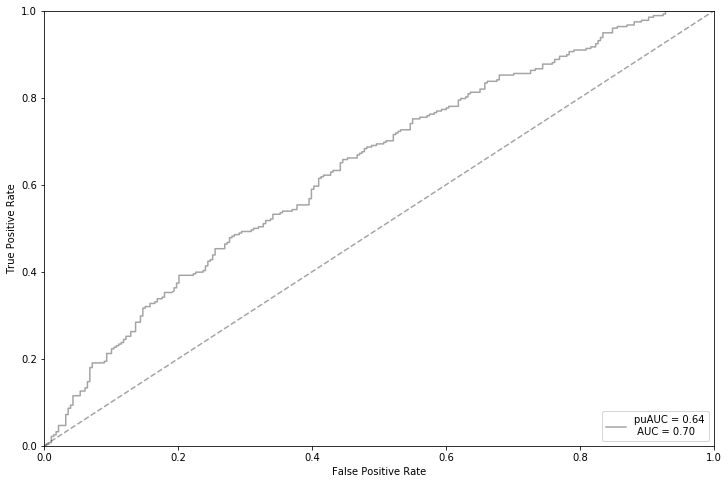

[0.15500476 0.18224997 0.07703832 0.10599983 0.08091874 0.06849374
 0.07791117 0.14033124 0.11205224]


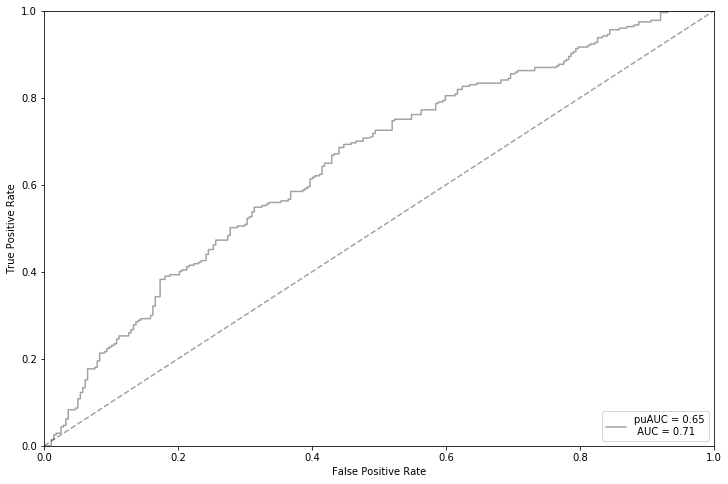

[0.15504291 0.17253286 0.12121383 0.09790812 0.05794538 0.05474235
 0.07033332 0.16531188 0.10496933]


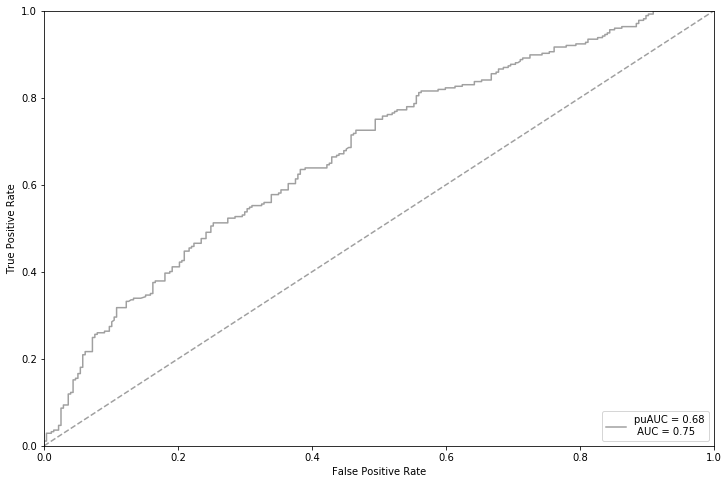

[0.15461455 0.1432427  0.09930132 0.14406141 0.0657179  0.08017621
 0.03791736 0.16490527 0.11006328]


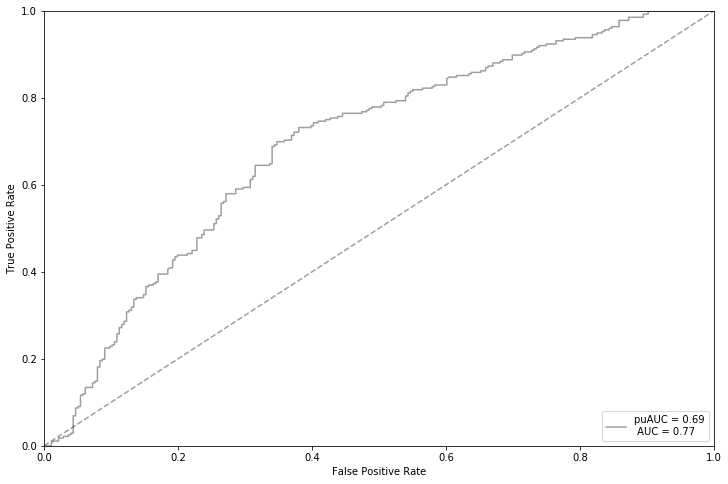

[0.2309176  0.0871886  0.0712998  0.07472609 0.06262921 0.05878134
 0.07662924 0.17728589 0.16054223]


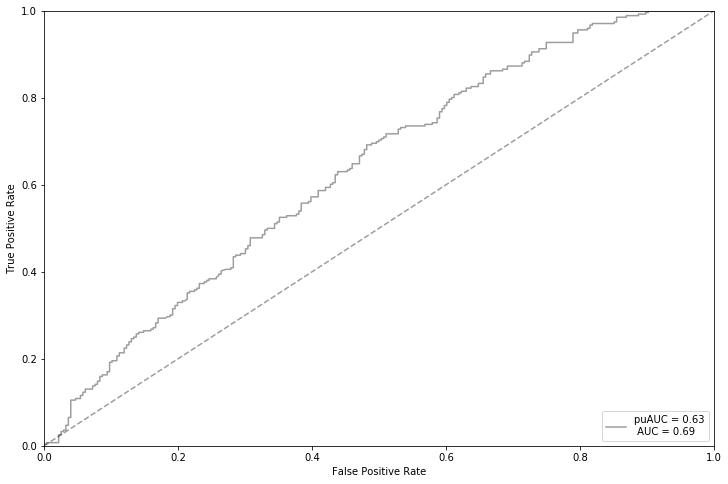

[0.20296222 0.12767262 0.08094038 0.10770034 0.07037525 0.07498295
 0.07088595 0.14716872 0.11731158]


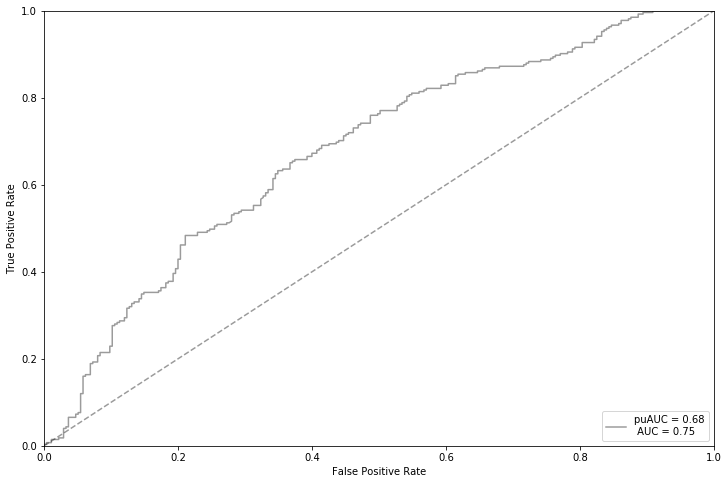

[0.15949264 0.11422729 0.16295014 0.09395047 0.06358292 0.07314263
 0.06630194 0.15869517 0.1076568 ]


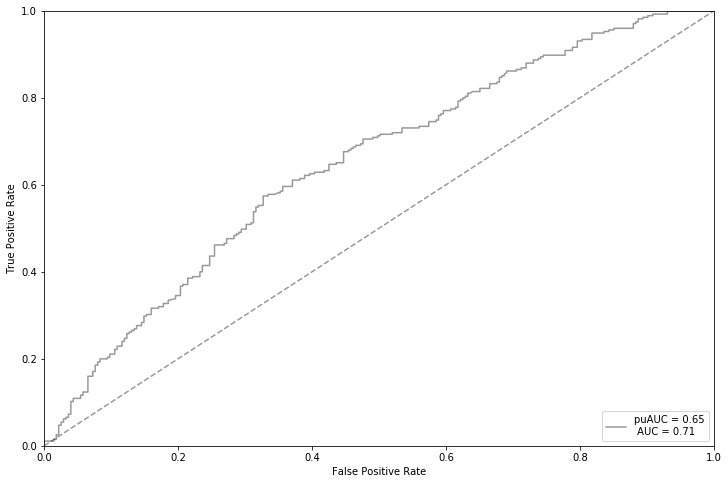

[0.25102842 0.12945812 0.1004592  0.13069657 0.08257805 0.05199493
 0.03227277 0.09002109 0.13149086]


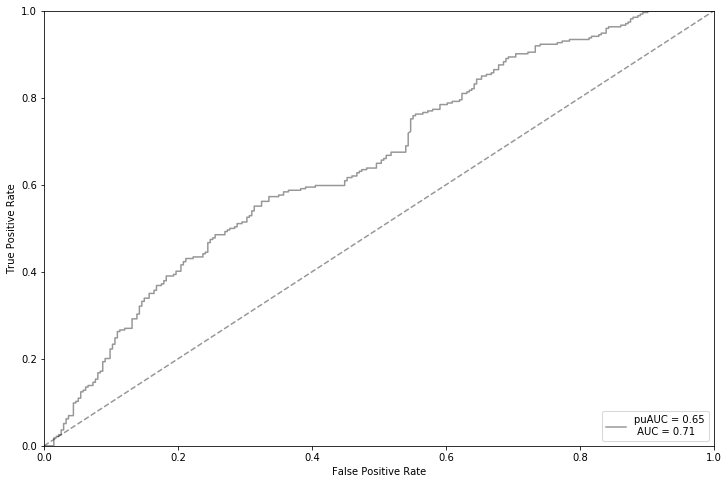

[0.20922264 0.11721162 0.12834776 0.13431953 0.05740714 0.06748808
 0.04949035 0.13753881 0.09897407]


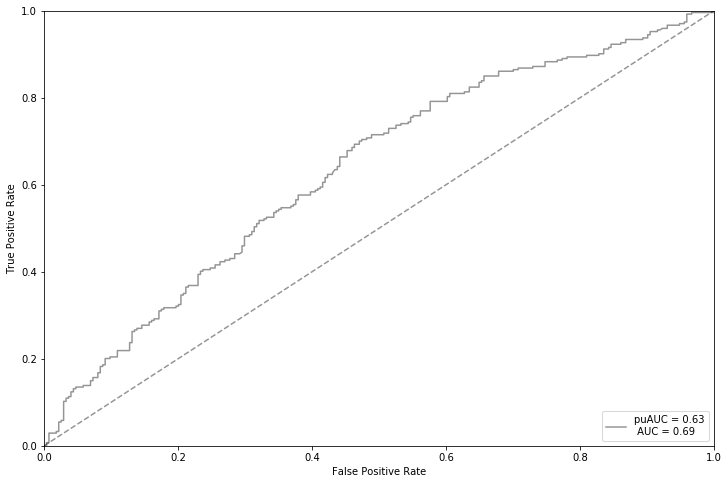

[0.18549303 0.11721262 0.12534322 0.11477031 0.05987908 0.06989912
 0.05517696 0.16727397 0.1049517 ]


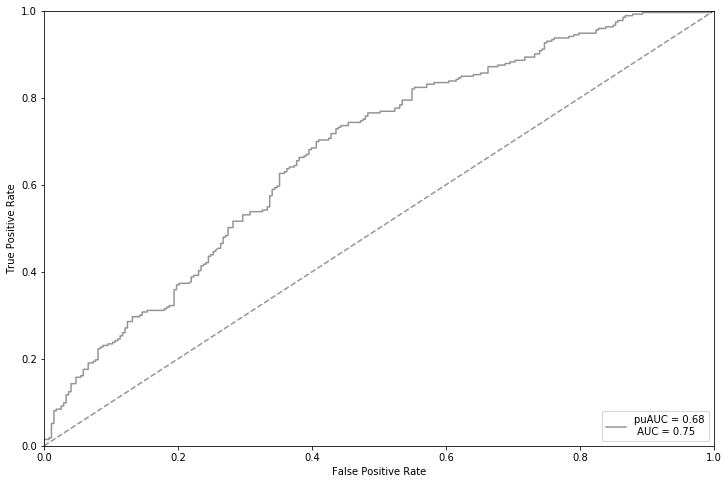

[0.20106501 0.13532384 0.07531242 0.20390405 0.06599919 0.05156845
 0.06605129 0.13033946 0.07043629]


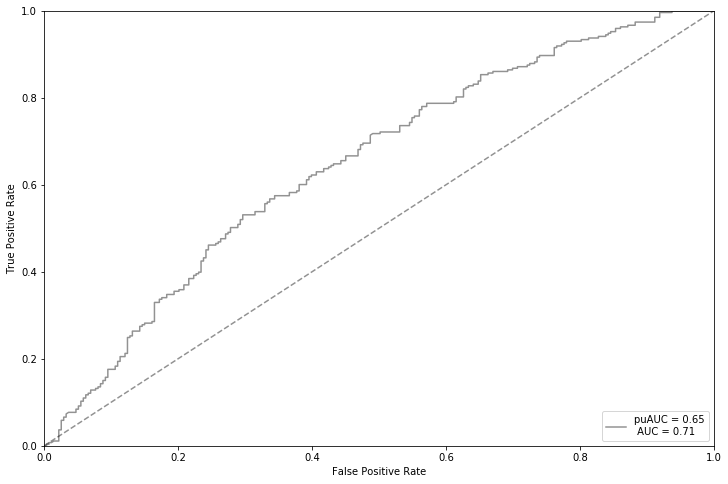

[0.20443784 0.13055778 0.091125   0.13761848 0.06143427 0.05045393
 0.05922284 0.14926713 0.11588274]


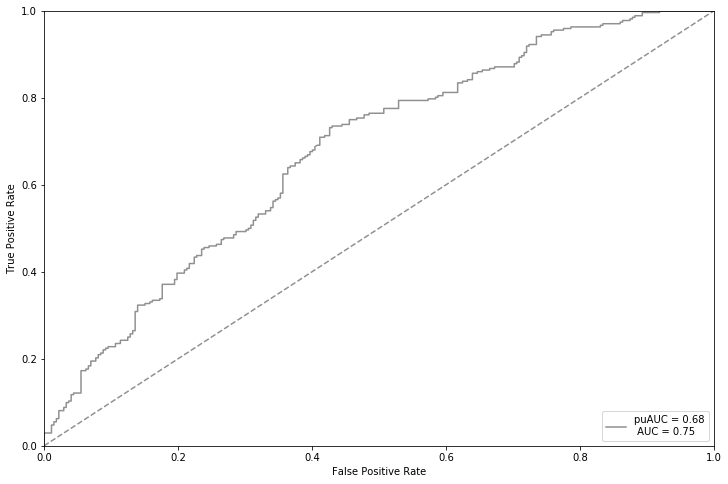

[0.21703868 0.12065851 0.13541417 0.1321505  0.06864869 0.07620994
 0.02714497 0.13776194 0.0849726 ]


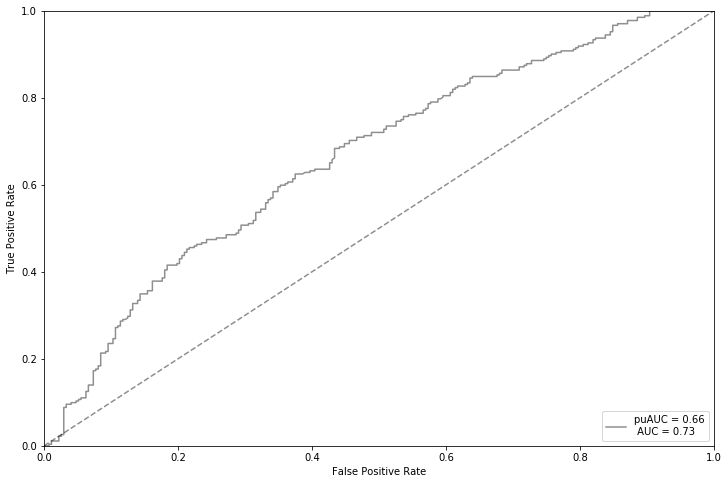

[0.17349728 0.15243134 0.09377579 0.1200654  0.07025908 0.06724042
 0.05148384 0.15282287 0.11842397]


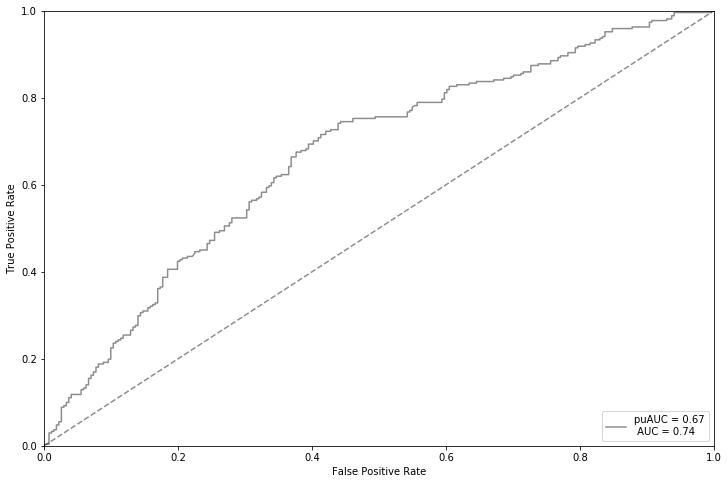

[0.18157497 0.13449913 0.09848994 0.07743343 0.1235664  0.05270288
 0.05905532 0.17875196 0.09392597]


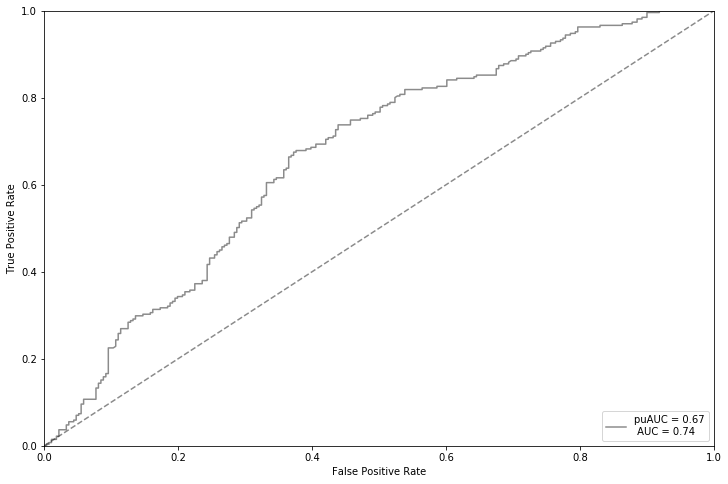

[0.15710381 0.15754852 0.08784176 0.1435403  0.0579321  0.06516545
 0.04852149 0.15137484 0.13097174]


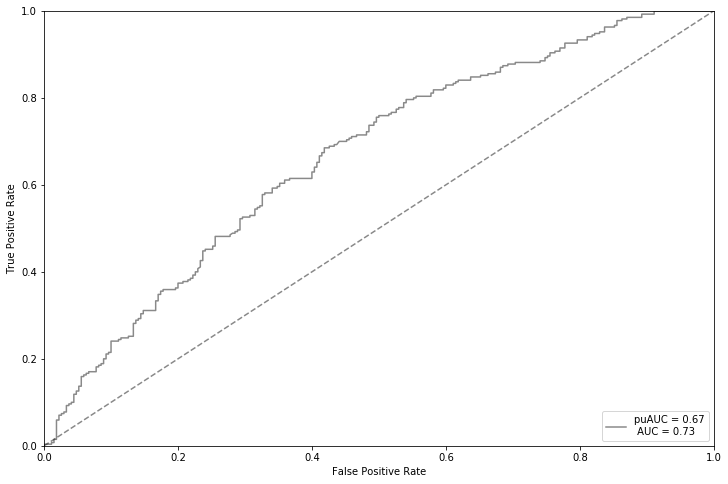

[0.13731638 0.18583732 0.12775788 0.09734084 0.08233655 0.06545888
 0.05789908 0.17617898 0.06987409]


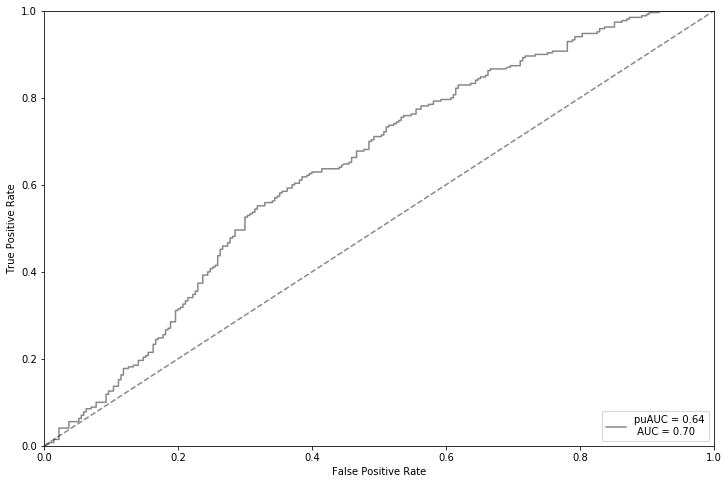

[0.27973862 0.09756566 0.11250961 0.11595926 0.06586878 0.05656741
 0.04703648 0.09492744 0.12982673]


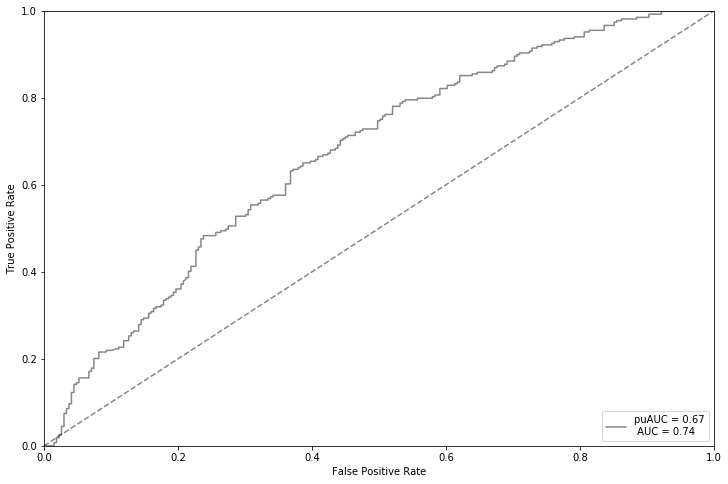

[0.15958864 0.0910665  0.12633444 0.13216167 0.05674203 0.06748605
 0.07432985 0.19115553 0.1011353 ]


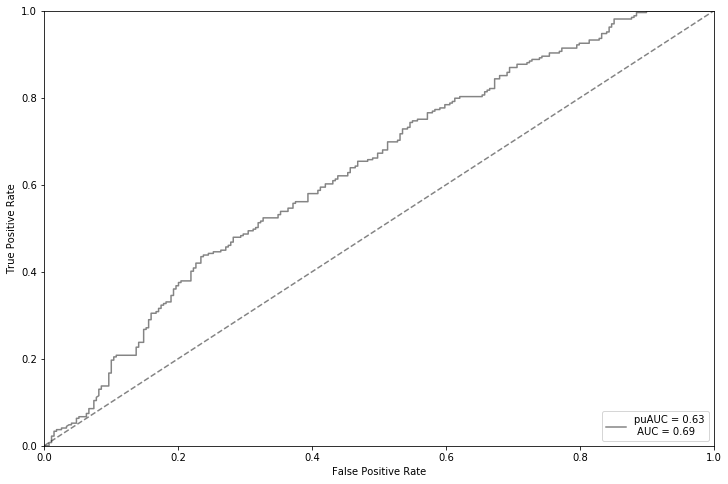

[0.13996939 0.13988182 0.07011796 0.19168951 0.06074023 0.07175576
 0.06002124 0.1755372  0.0902869 ]


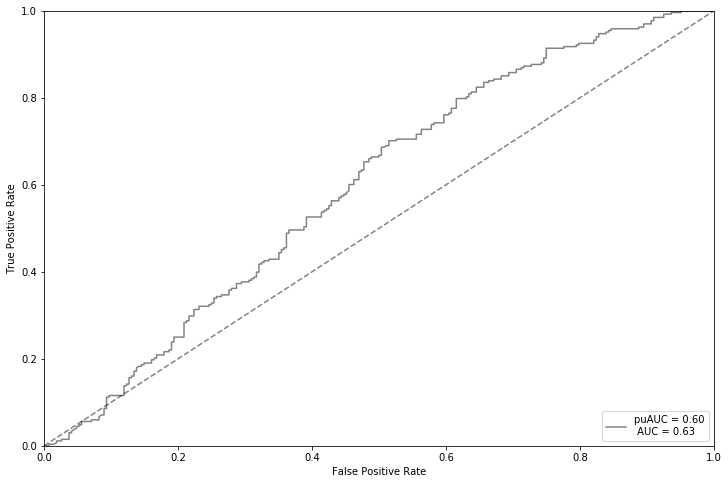

[0.19096243 0.11023474 0.13742546 0.12572343 0.08634527 0.06460182
 0.05153507 0.16249798 0.0706738 ]


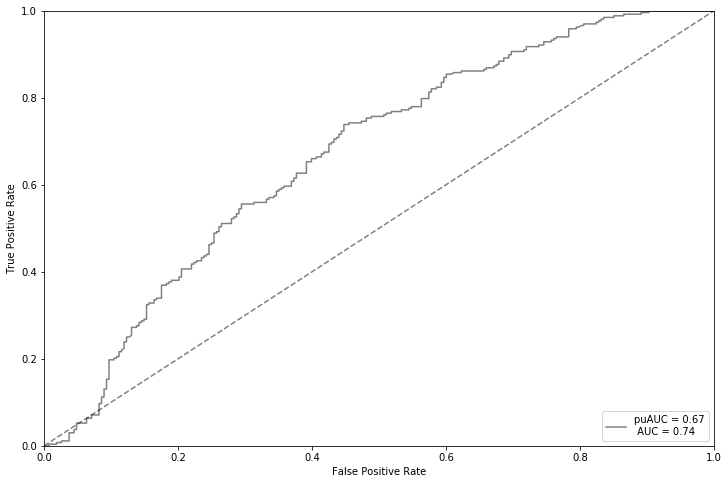

[0.11945935 0.1169567  0.12914549 0.09531637 0.0514489  0.09486831
 0.03331111 0.17377258 0.18572118]


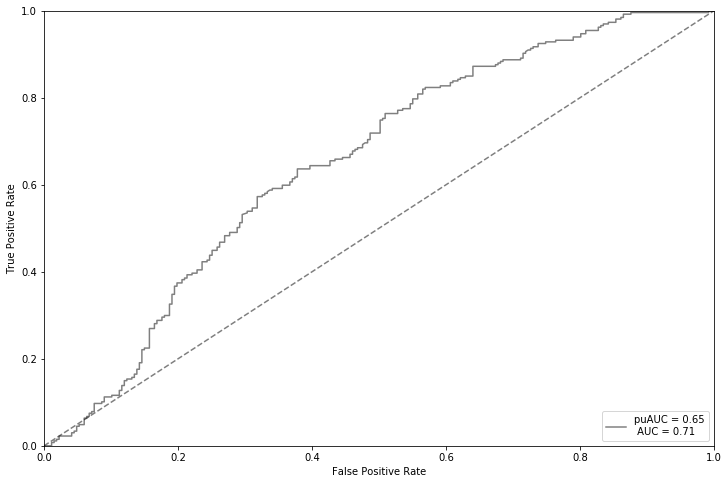

[0.13946973 0.08562966 0.11937056 0.09207725 0.13738738 0.05398995
 0.05142797 0.21580227 0.10484523]


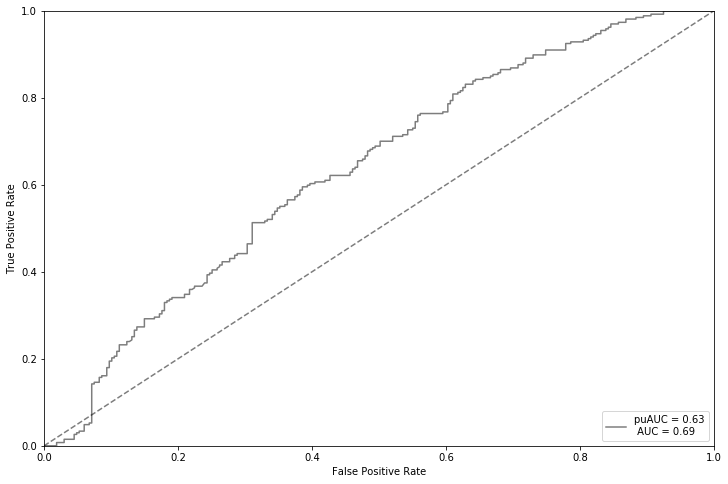

[0.20648057 0.11993222 0.10643095 0.07496339 0.07596195 0.07967655
 0.06048016 0.15068762 0.12538659]


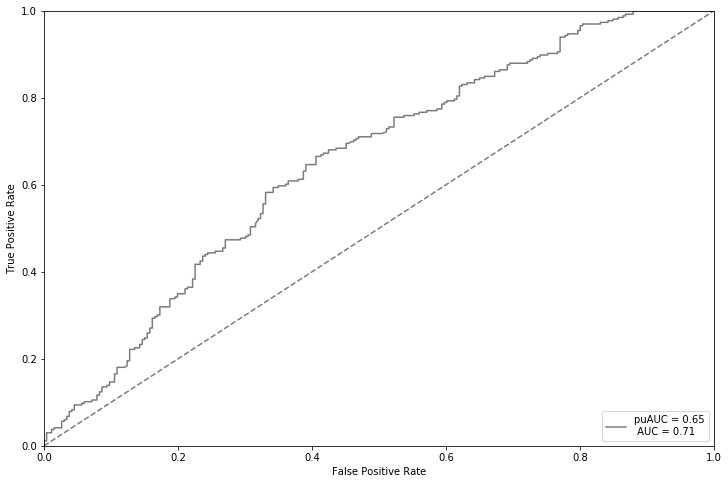

[0.28544898 0.10529269 0.08264659 0.12780617 0.0492431  0.0467484
 0.02918028 0.19847064 0.07516315]


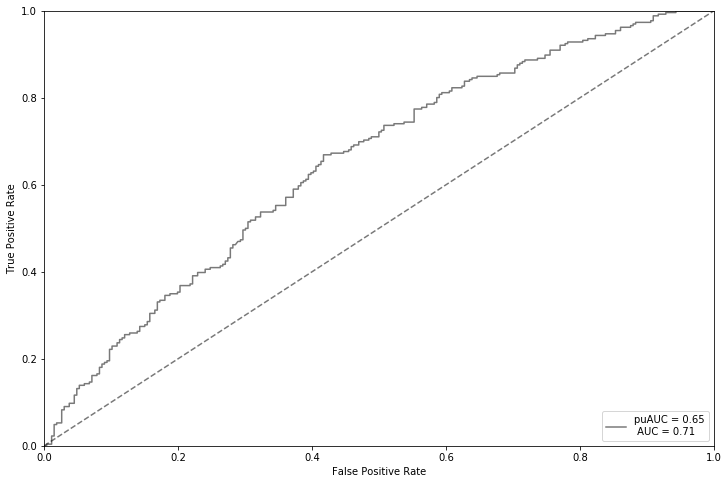

[0.17562554 0.10010984 0.0627339  0.09059963 0.06584764 0.05491711
 0.0972853  0.23058591 0.12229513]


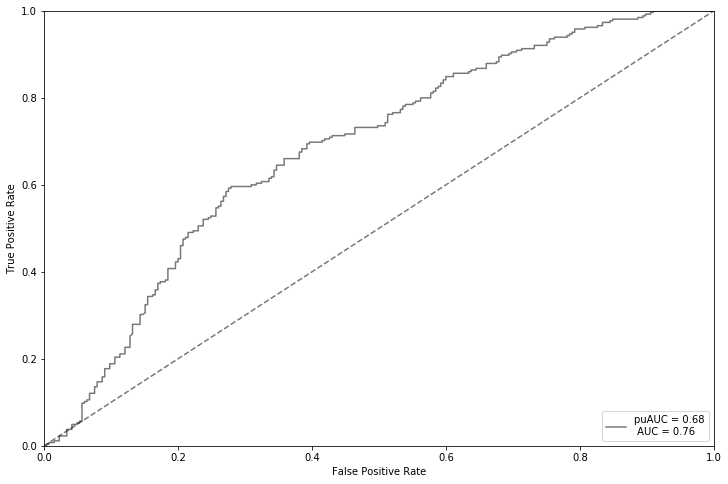

[0.15132878 0.14916942 0.06962866 0.10294981 0.06452194 0.06239537
 0.06582808 0.20733427 0.12684368]


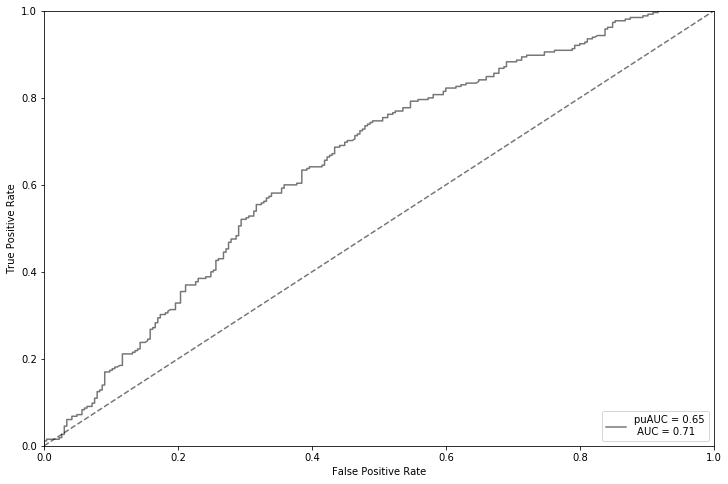

[0.18514049 0.10876    0.09545292 0.13541984 0.06189984 0.0841309
 0.07061005 0.13484255 0.1237434 ]


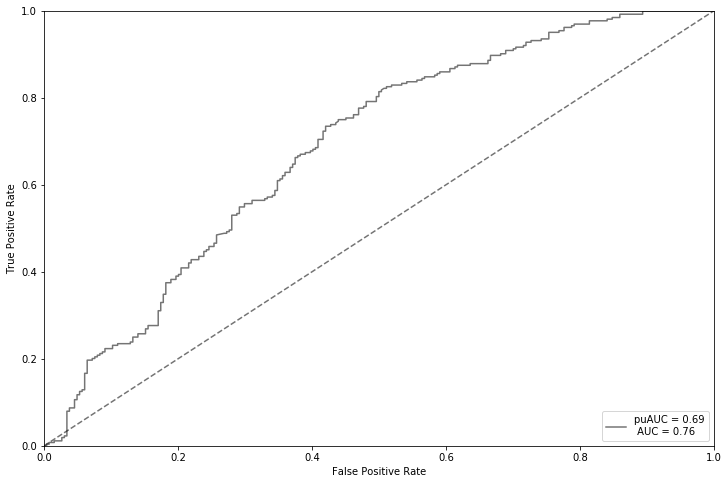

[0.17734217 0.13919032 0.08323002 0.11257055 0.08823992 0.07388419
 0.06506318 0.1607752  0.09970446]


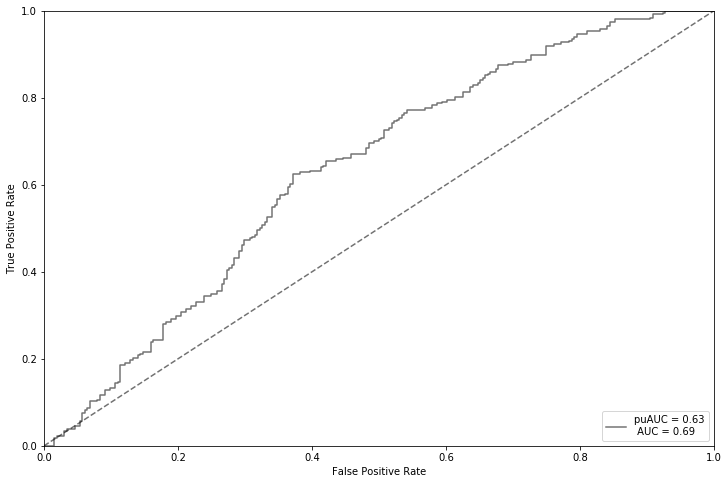

[0.13445555 0.10942059 0.0912181  0.10819318 0.09813102 0.09161671
 0.06903705 0.20794981 0.089978  ]


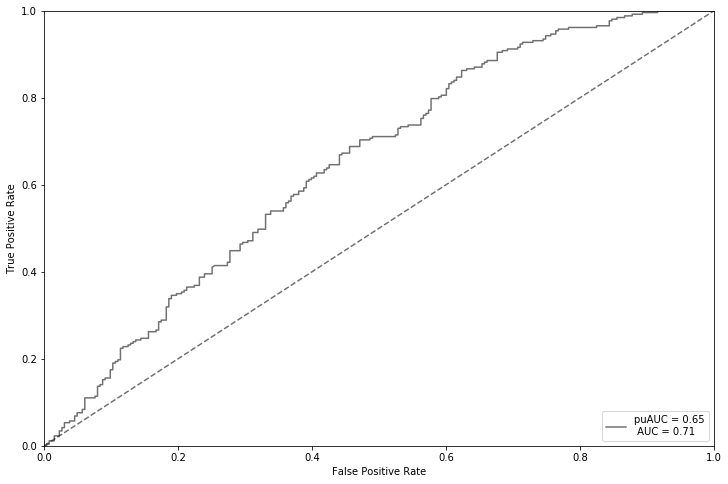

[0.21477264 0.13906194 0.09157884 0.11228252 0.0853935  0.07545444
 0.06921138 0.09947638 0.11276838]


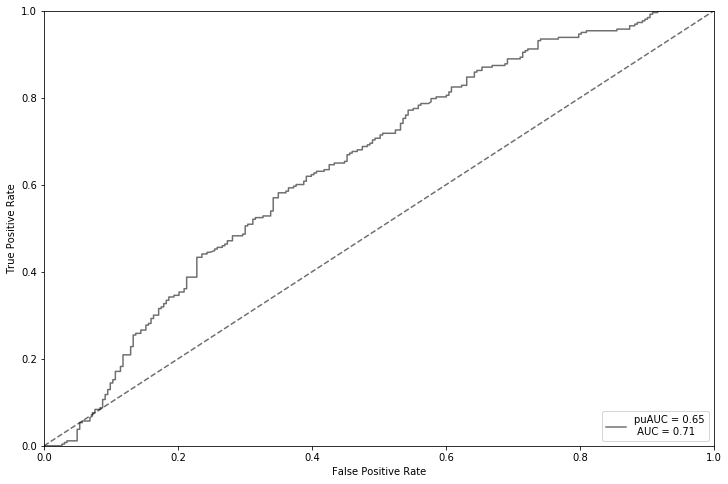

[0.17680704 0.08537849 0.0875191  0.10355086 0.06348571 0.06446967
 0.08057973 0.20309088 0.13511852]


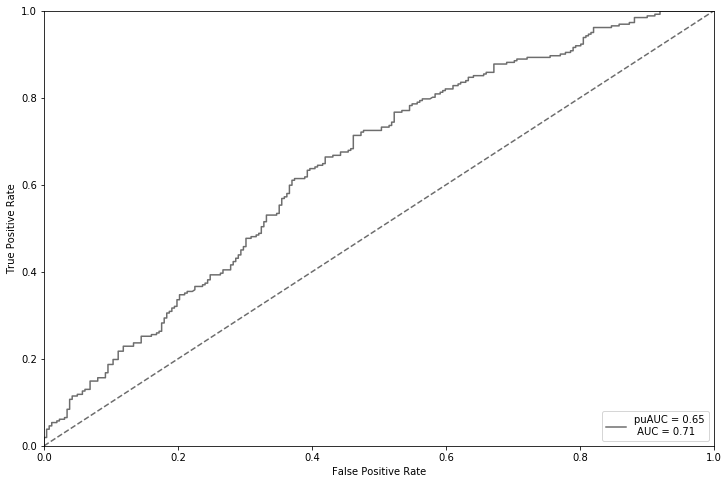

[0.15455193 0.12119024 0.13904226 0.15179456 0.06827346 0.05817238
 0.05106409 0.1516152  0.10429586]


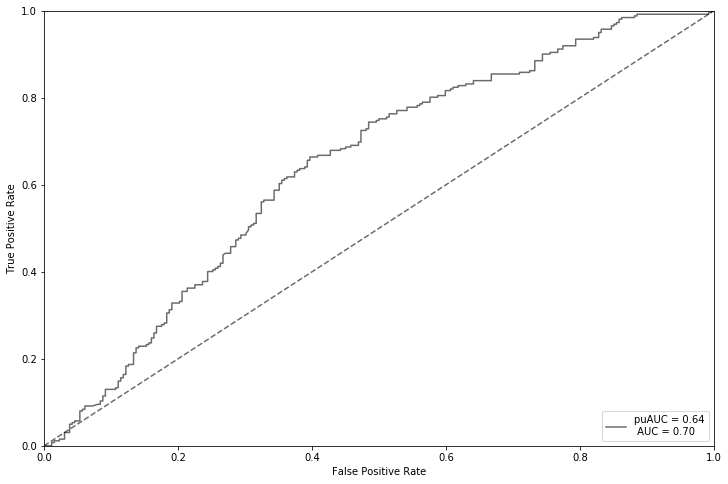

[0.18885141 0.136548   0.06636423 0.0845717  0.08566572 0.06289645
 0.06184011 0.18184197 0.13142041]


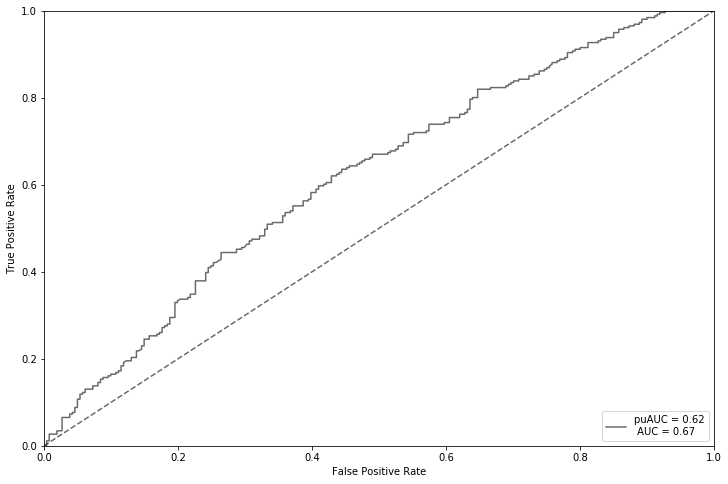

[0.19187591 0.16503089 0.08775145 0.14664298 0.07863777 0.07085535
 0.0424151  0.11153434 0.10525622]


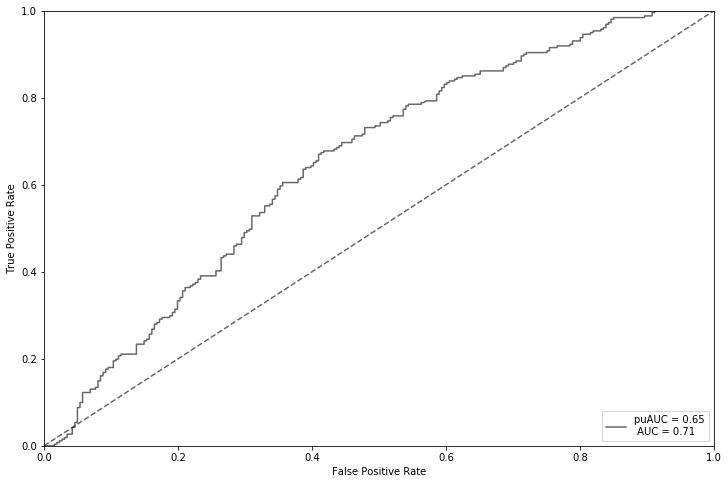

[0.16339669 0.11432657 0.11556753 0.15258568 0.05070466 0.06817724
 0.06415816 0.13207566 0.1390078 ]


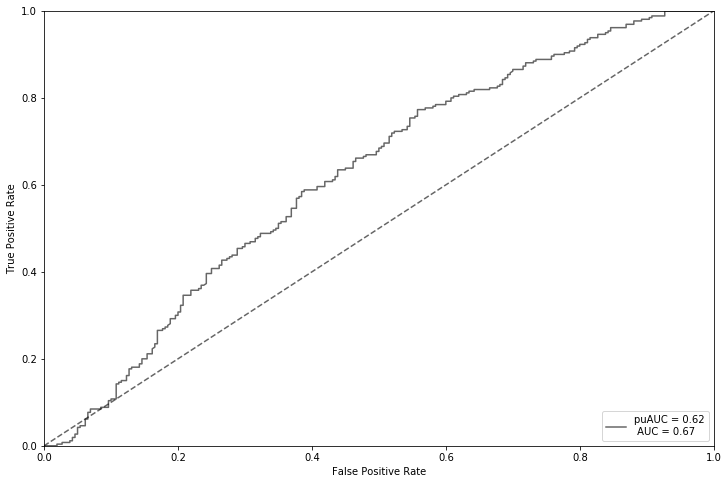

[0.23998777 0.13602482 0.08333092 0.10451217 0.04701952 0.04308694
 0.06122254 0.19855569 0.08625964]


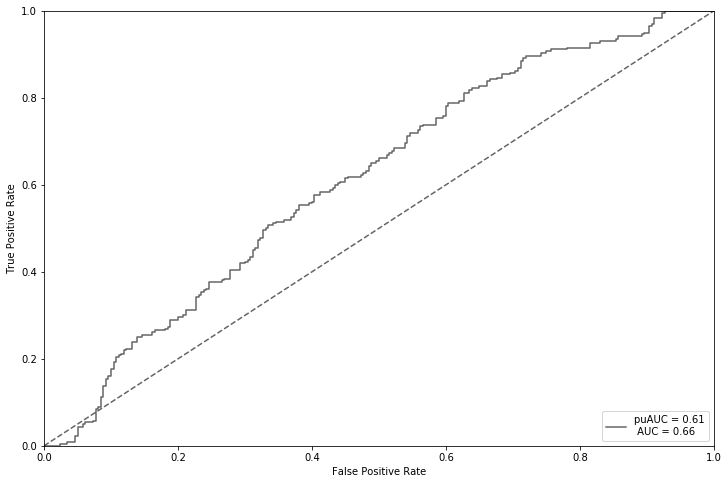

[0.19763409 0.10981937 0.09318067 0.14427712 0.06836668 0.08265108
 0.09482878 0.10132142 0.10792079]


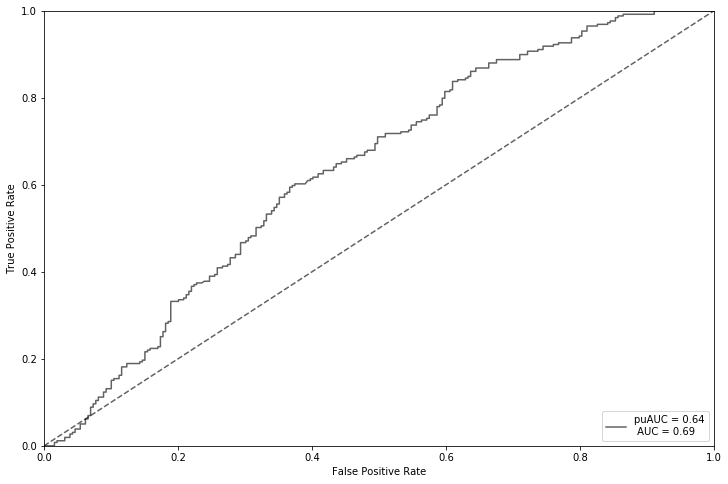

[0.1484519  0.1468559  0.08726818 0.11942216 0.07145515 0.07637169
 0.10007653 0.17063826 0.07946022]


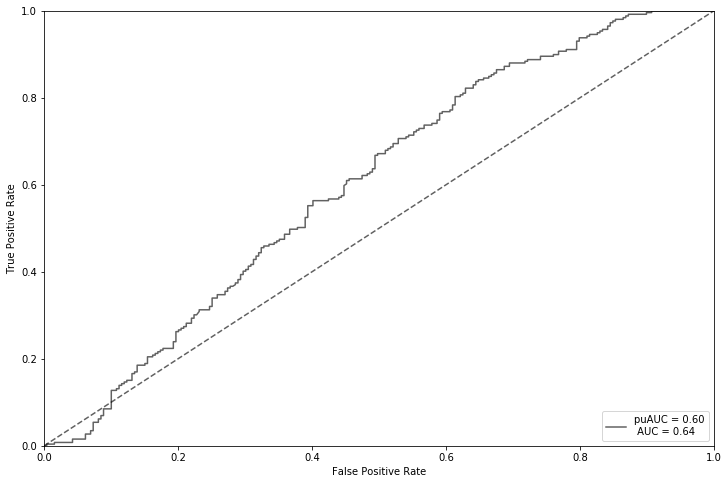

[0.16299854 0.15423254 0.08764779 0.15094358 0.047635   0.09398009
 0.06327244 0.14333247 0.09595756]


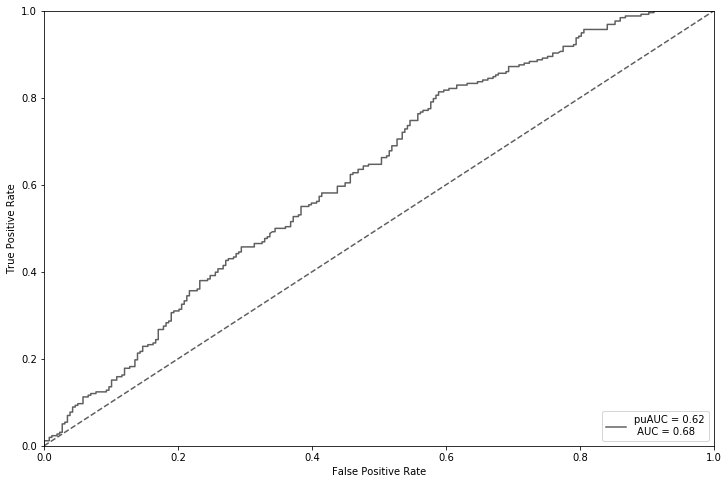

[0.27263391 0.11410116 0.09588753 0.08969844 0.09925867 0.05250248
 0.03677689 0.122358   0.11678292]


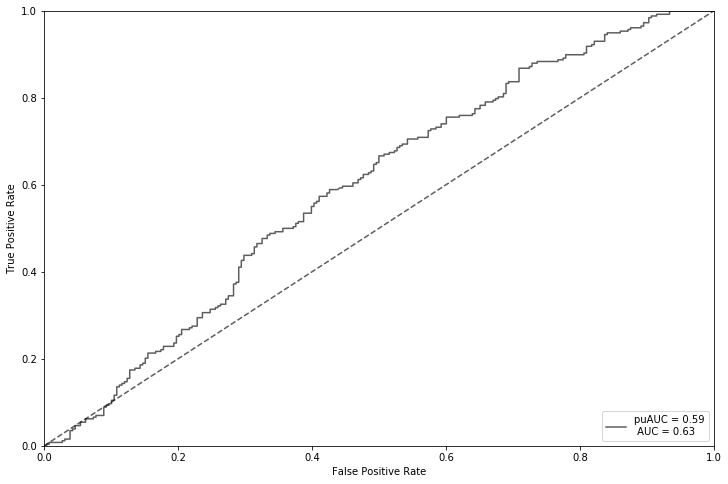

[0.22644288 0.11697217 0.05709194 0.15237878 0.1015506  0.04328475
 0.05703453 0.15360227 0.09164209]


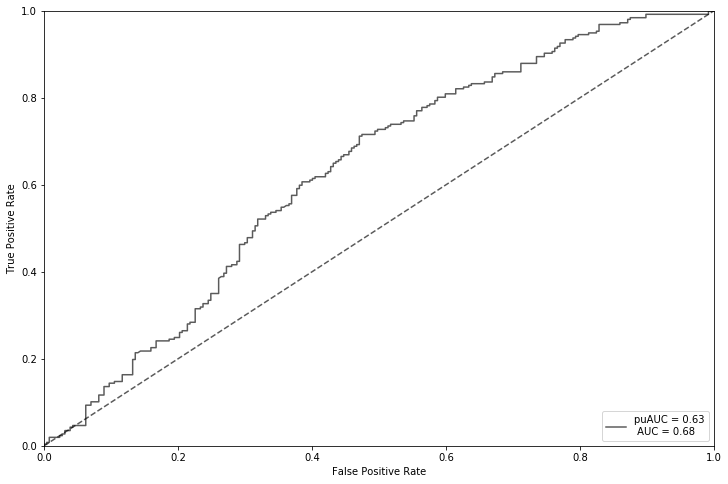

[0.20501288 0.16169416 0.10635932 0.08515208 0.07615843 0.06151834
 0.0647521  0.11295522 0.12639747]


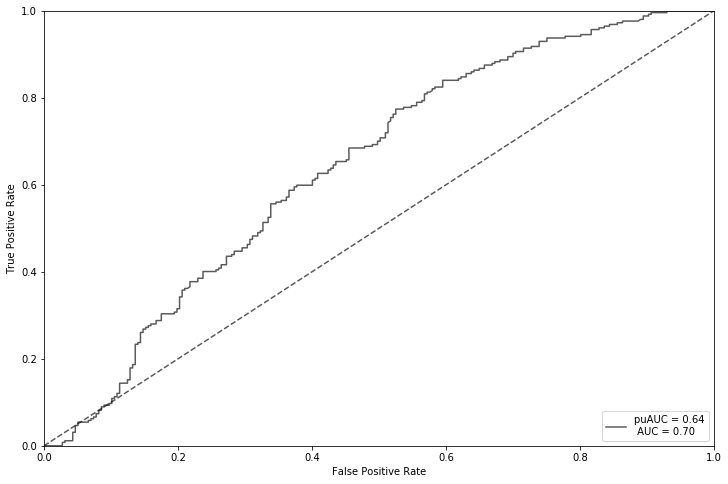

[0.27615304 0.10975517 0.09124927 0.11062111 0.08580737 0.07181016
 0.05205012 0.11776823 0.08478554]


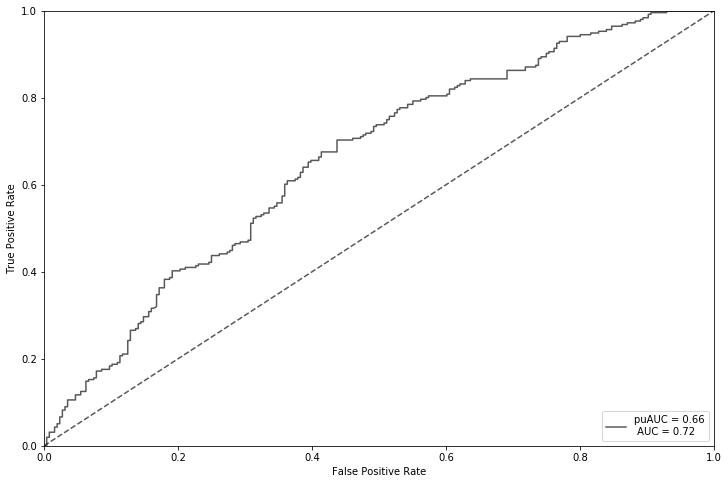

[0.24779822 0.10714465 0.08227702 0.09597932 0.05440509 0.06518598
 0.05355103 0.15529703 0.13836167]


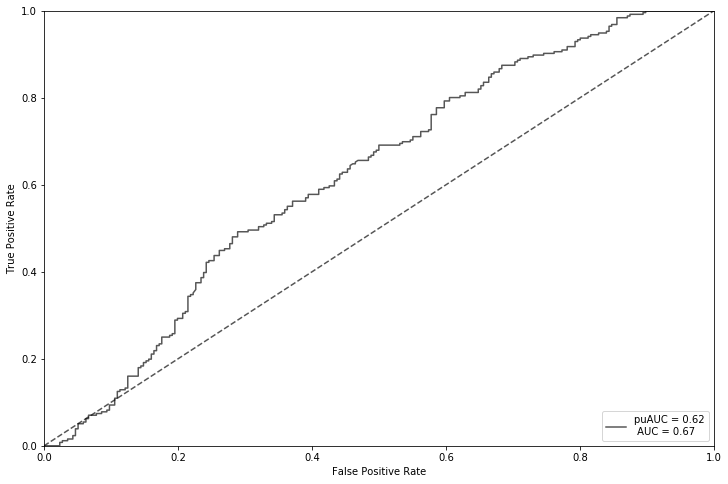

[0.20865249 0.15252043 0.09321537 0.0979014  0.08017313 0.05479826
 0.05668771 0.1530559  0.10299531]


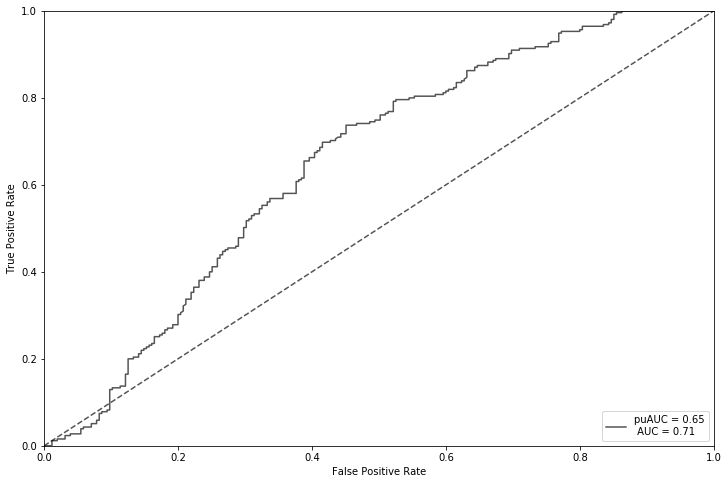

[0.19205771 0.10425162 0.09096887 0.12909683 0.0879297  0.06271511
 0.04721778 0.11967012 0.16609227]


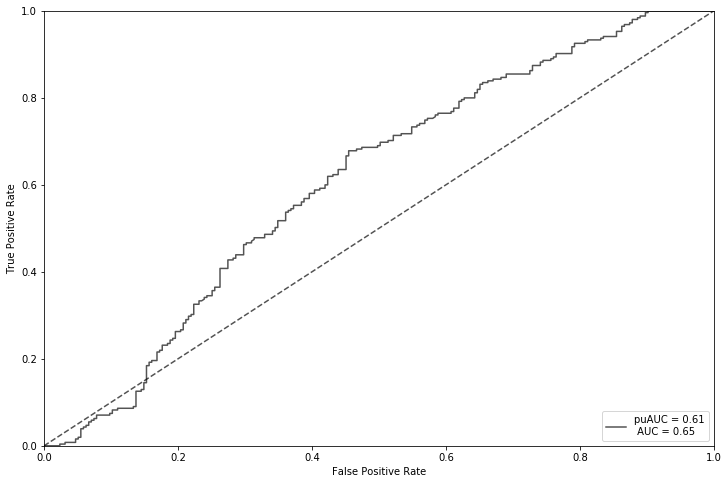

[0.16949329 0.14661919 0.08914834 0.12337889 0.07790275 0.07096617
 0.06080752 0.13863432 0.12304953]


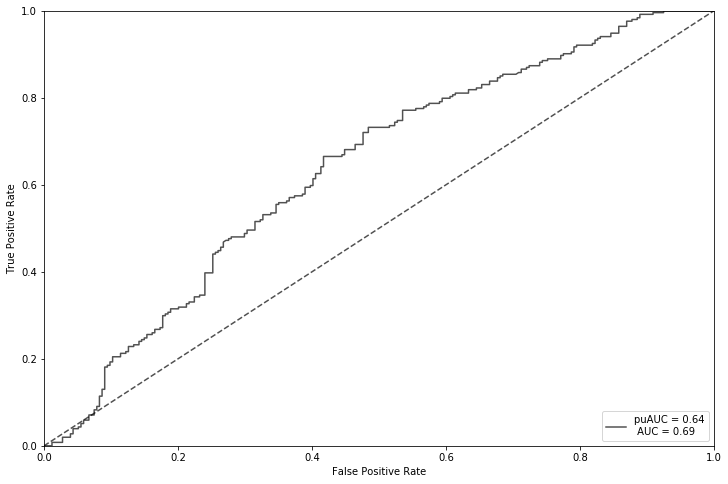

[0.10935328 0.1612042  0.07368893 0.09605759 0.05507071 0.05485636
 0.05889829 0.19442795 0.19644268]


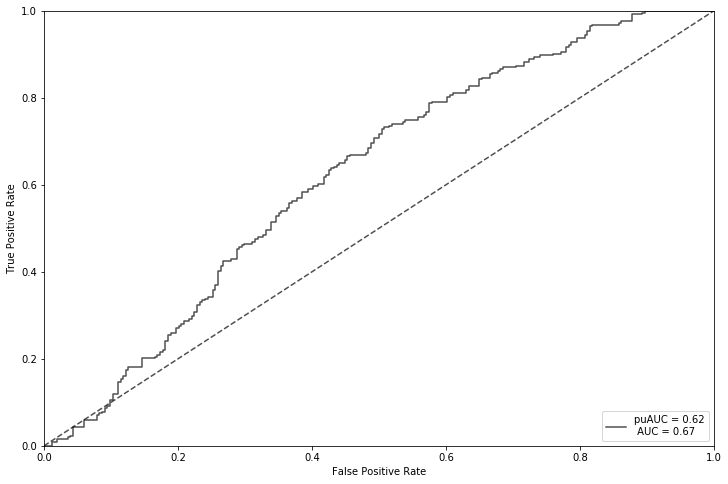

[0.18039472 0.10462394 0.11417391 0.09025325 0.06223158 0.07419858
 0.07011298 0.12833776 0.17567329]


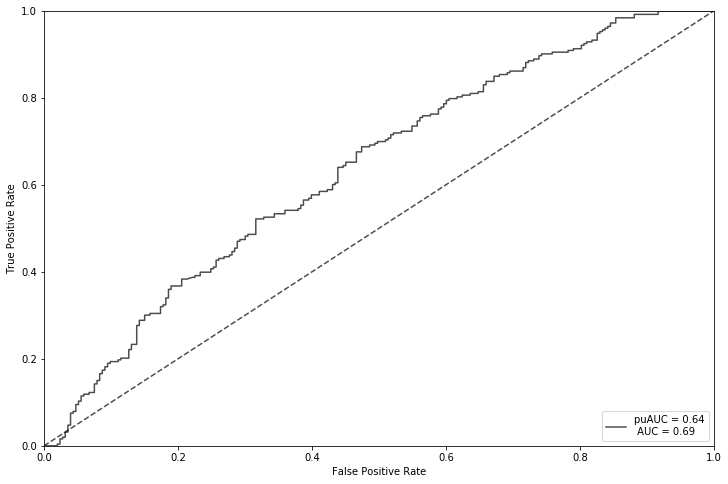

[0.2193959  0.18655748 0.09476205 0.08993429 0.07634949 0.06982017
 0.05461896 0.12670602 0.08185563]


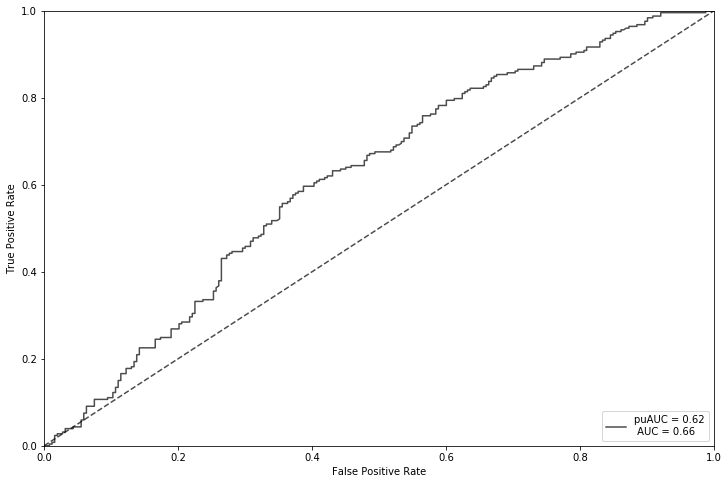

[0.15449551 0.16704195 0.12900769 0.14196974 0.06675254 0.06704327
 0.06276628 0.12437253 0.0865505 ]


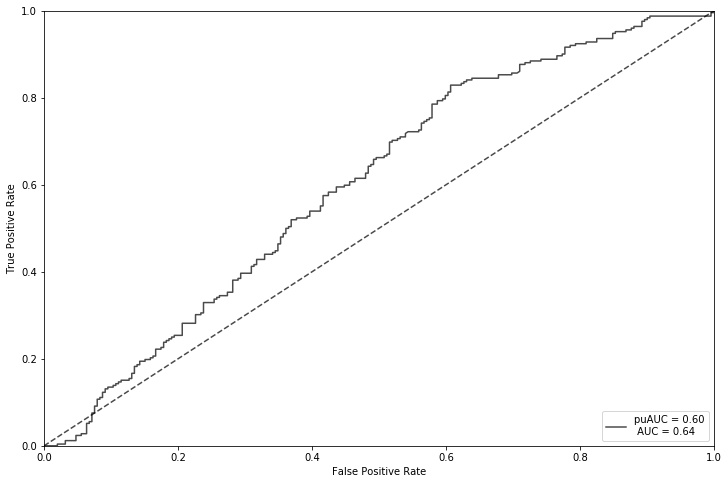

[0.11674443 0.10153287 0.11344004 0.10661367 0.07613967 0.0748536
 0.05624142 0.23375208 0.12068221]


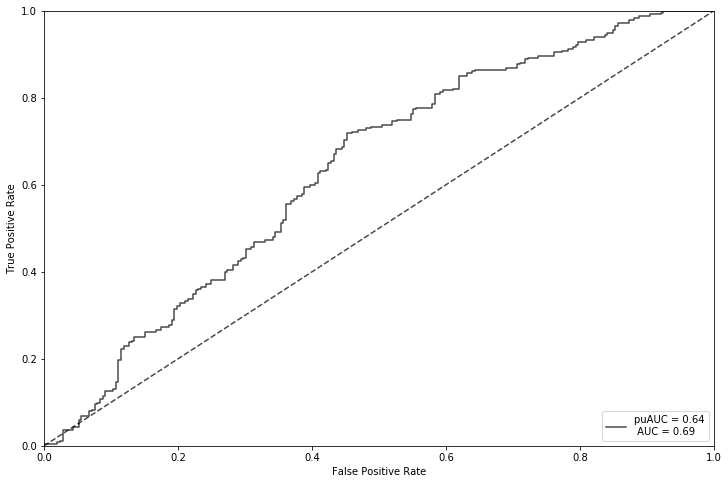

[0.18598885 0.17936818 0.0833229  0.11028215 0.08958074 0.07896748
 0.05624441 0.12564551 0.09059978]


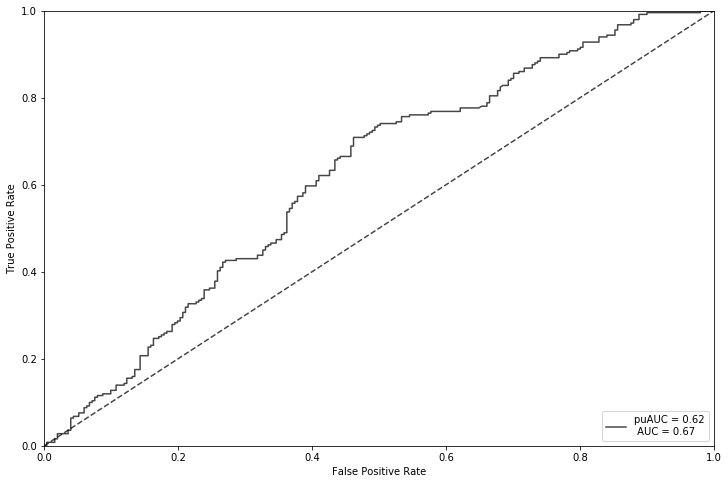

[0.1381731  0.09444577 0.11221373 0.13761517 0.07631515 0.07309111
 0.06596009 0.14626714 0.15591874]


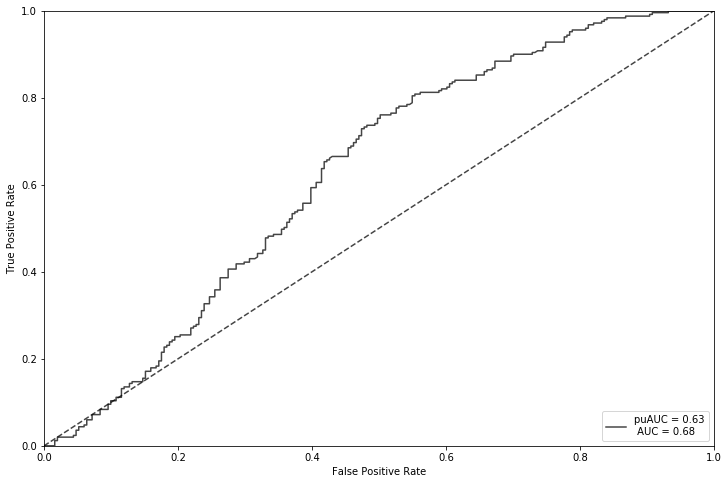

[0.17842867 0.1382683  0.09040427 0.16719898 0.06570257 0.0530223
 0.0568446  0.14992012 0.1002102 ]


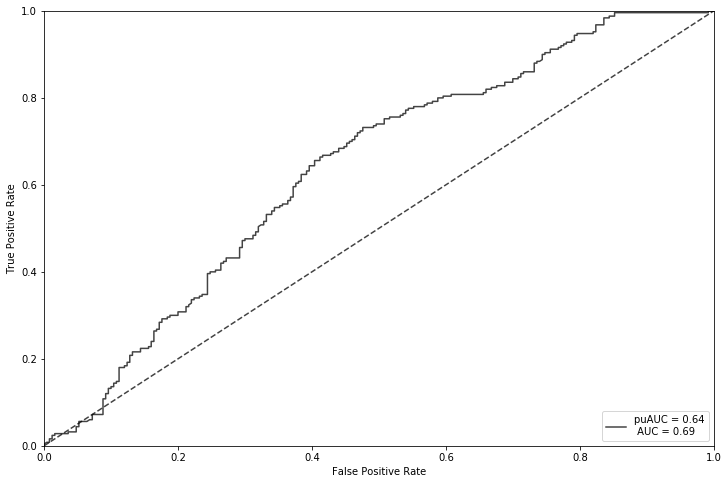

[0.09996996 0.13097056 0.10960535 0.17280976 0.06630837 0.05837178
 0.06122818 0.12016128 0.18057476]


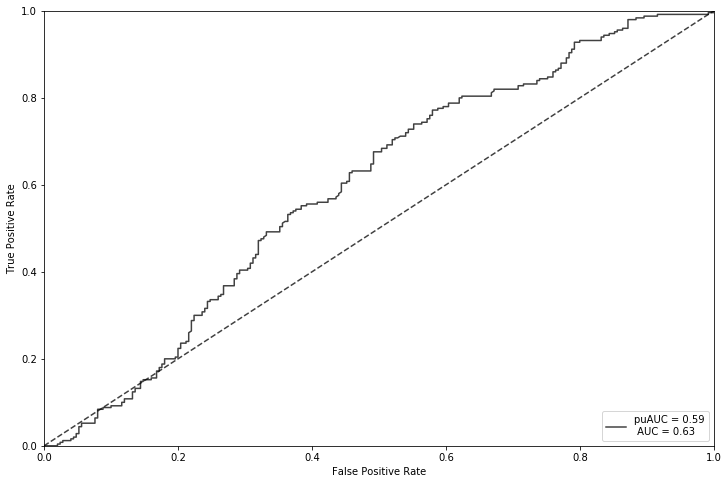

[0.26558703 0.12645861 0.07220087 0.06667806 0.05175808 0.06433002
 0.08259053 0.1763913  0.09400549]


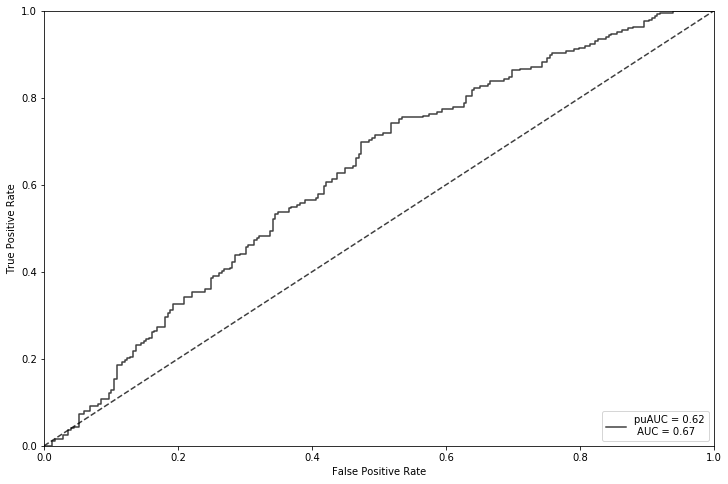

[0.18712763 0.07856896 0.12150667 0.12495932 0.10114257 0.0812056
 0.0600591  0.12136226 0.1240679 ]


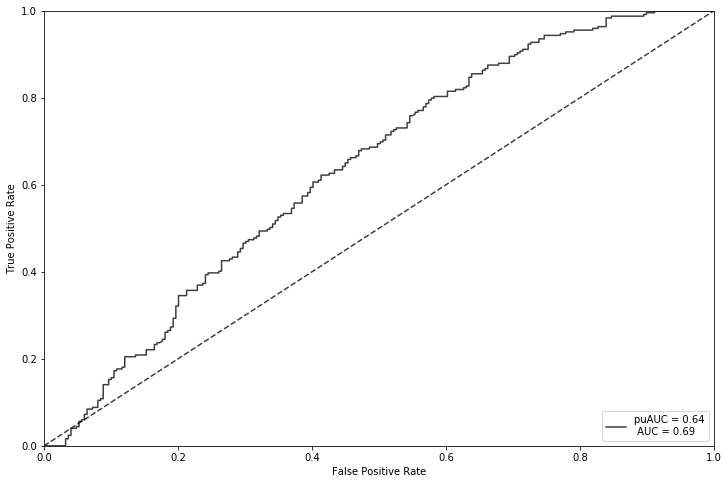

[0.15924684 0.16599769 0.08227838 0.09761872 0.08638931 0.07191935
 0.06267897 0.11523613 0.1586346 ]


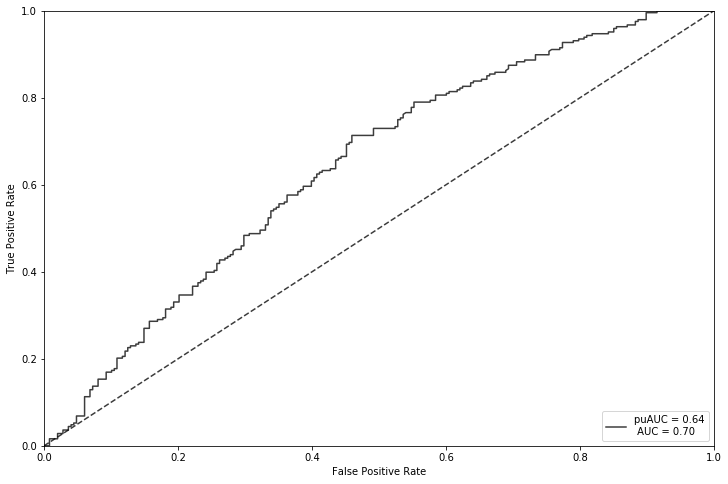

[0.22852239 0.12789713 0.15462923 0.10811847 0.06738931 0.06996952
 0.04821299 0.11604184 0.0792191 ]


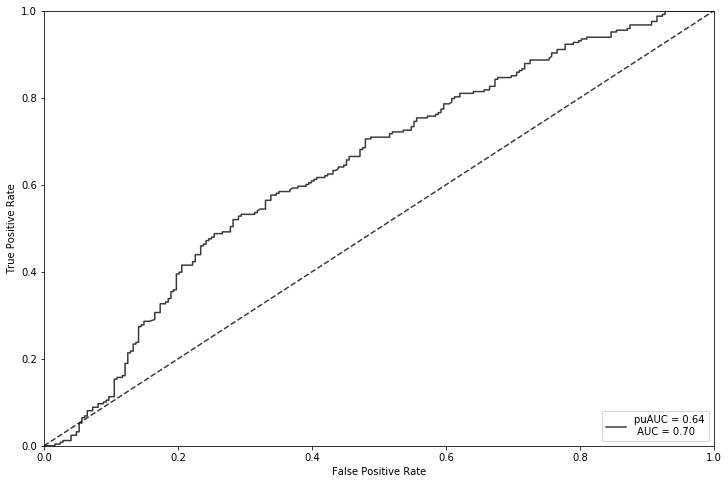

[0.14795251 0.14123296 0.08775761 0.1236379  0.0579709  0.06382013
 0.06820658 0.17681666 0.13260474]


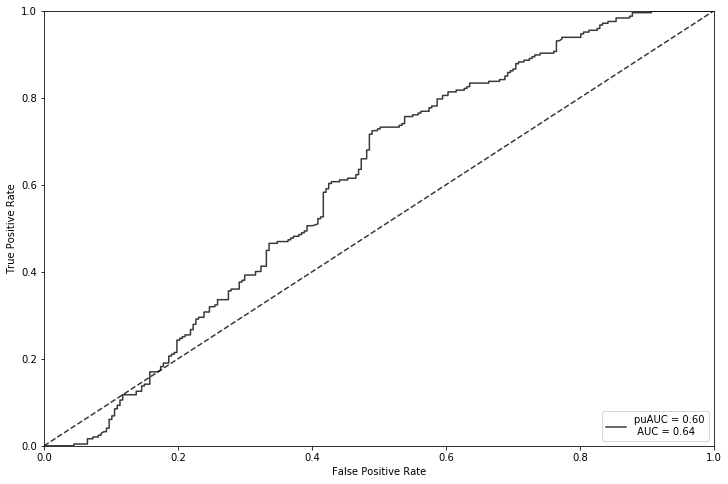

[0.21221807 0.12412682 0.07662157 0.1200252  0.05983193 0.0465108
 0.04732794 0.18093044 0.13240723]


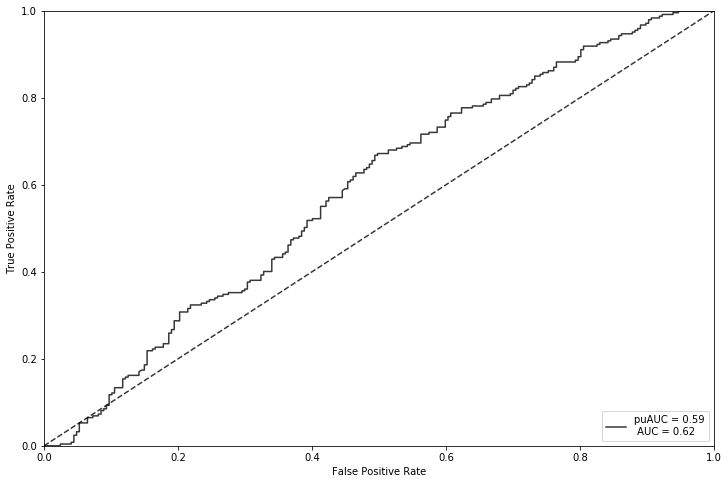

[0.14046278 0.12213003 0.08683652 0.1230795  0.09470382 0.07647681
 0.06575528 0.14619079 0.14436448]


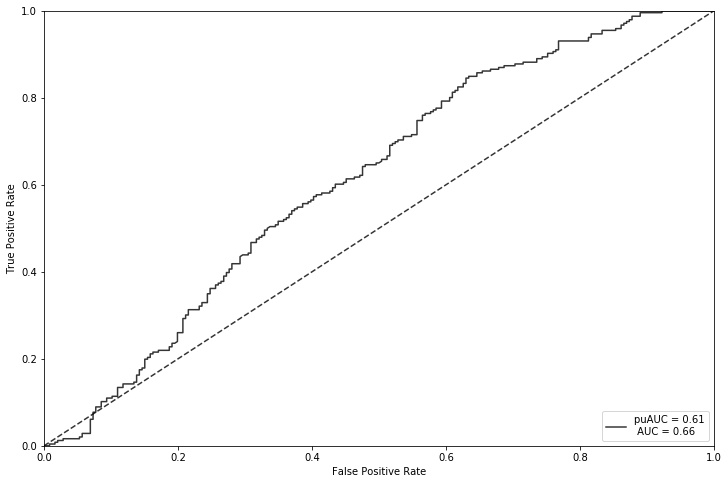

[0.26160578 0.1483799  0.08419342 0.08748711 0.09274462 0.06637349
 0.05670316 0.13059759 0.07191493]


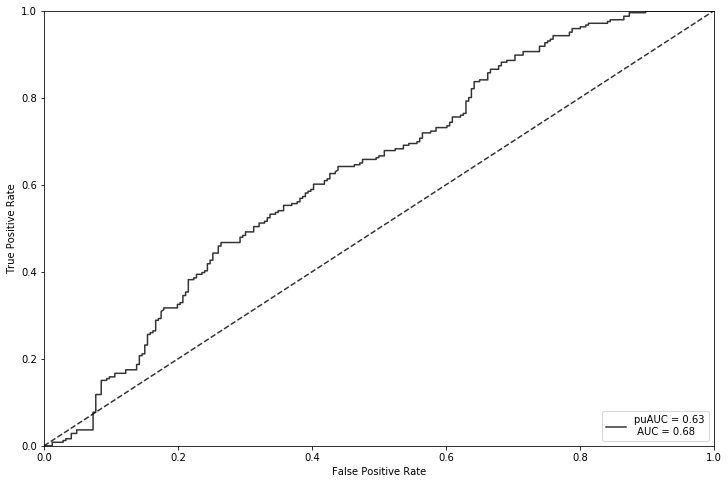

[0.20690833 0.15583111 0.07758401 0.0875803  0.09420543 0.06874296
 0.05251323 0.11482283 0.14181179]


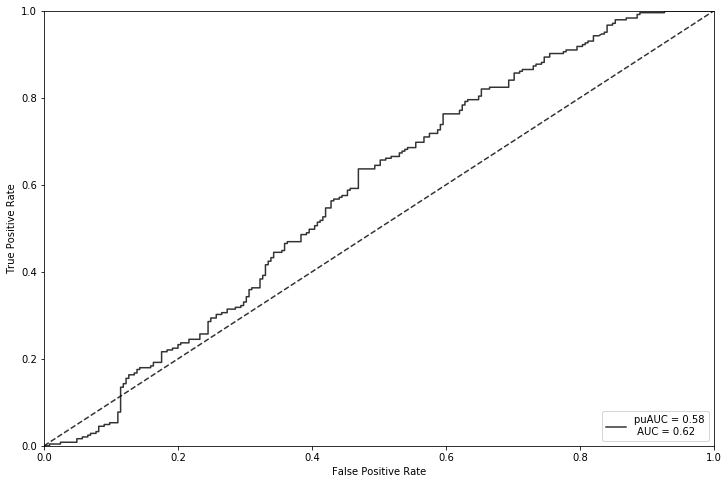

[0.18729348 0.08447713 0.14078101 0.12787237 0.06027429 0.09089127
 0.0538141  0.14199535 0.11260101]


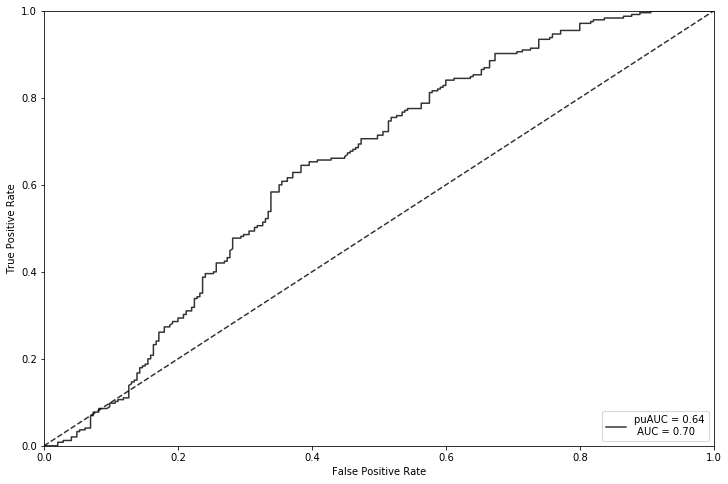

[0.15984324 0.15511637 0.11957937 0.1523766  0.06166759 0.0708656
 0.05036801 0.11936302 0.11082019]


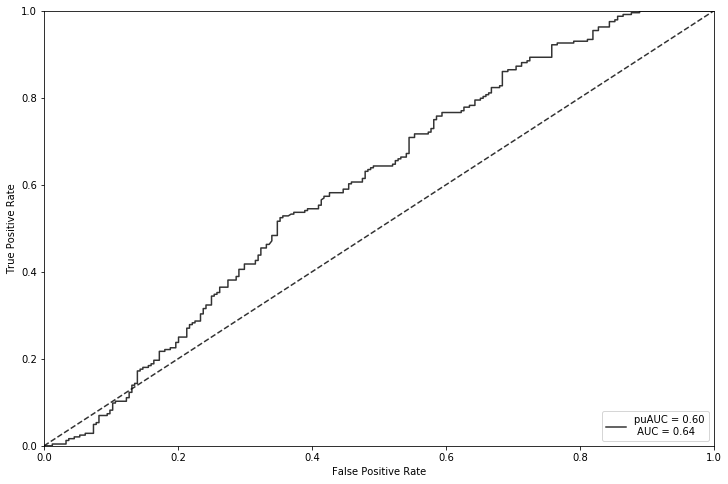

[0.21537174 0.074819   0.10394004 0.16637889 0.07226303 0.05687351
 0.06194114 0.10191202 0.14650064]


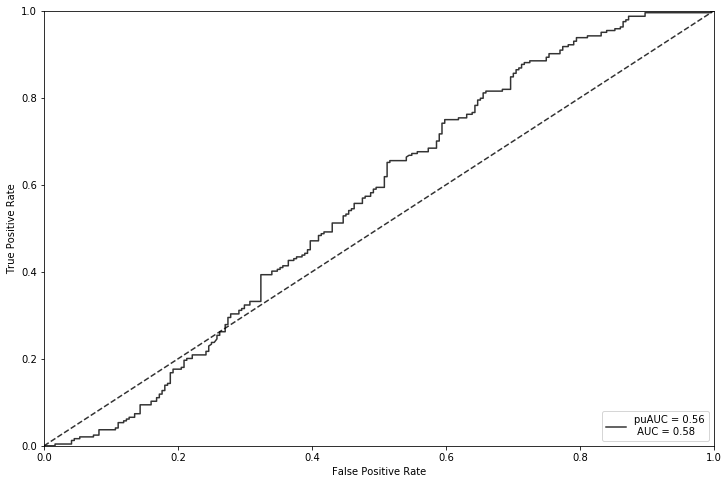

[0.20902383 0.11716409 0.09399626 0.11334723 0.06188192 0.1026806
 0.05094686 0.15891486 0.09204435]


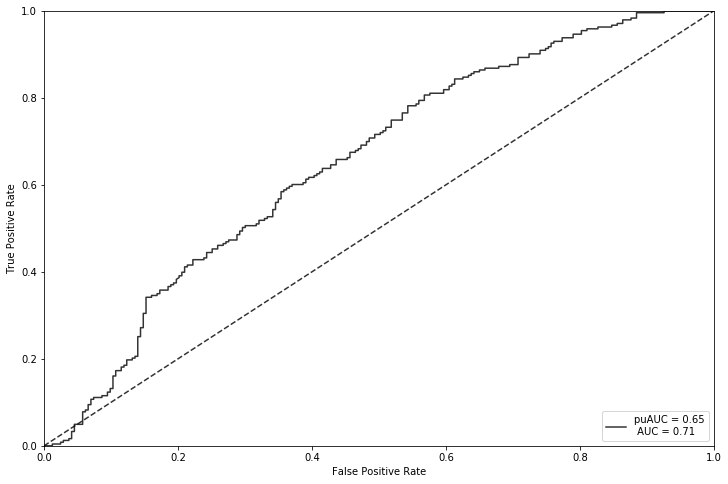

[0.22477299 0.19595348 0.07862545 0.08553015 0.06948396 0.06574589
 0.0664606  0.07448737 0.13894011]


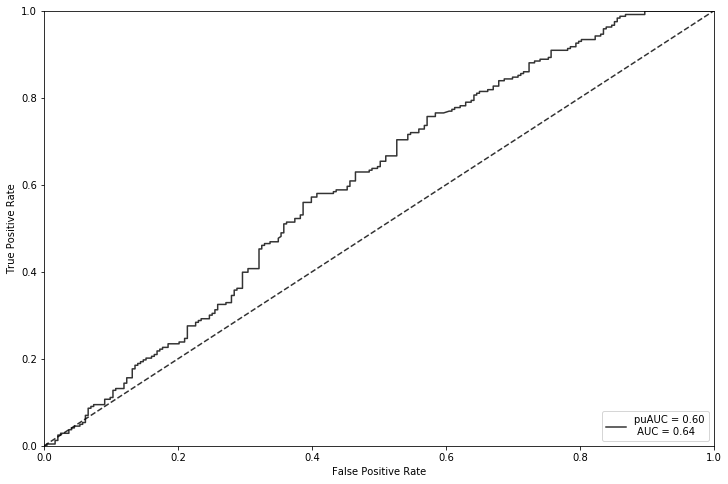

[0.2237497  0.12571501 0.10803636 0.08379296 0.08755812 0.08111769
 0.04837381 0.11607113 0.12558522]


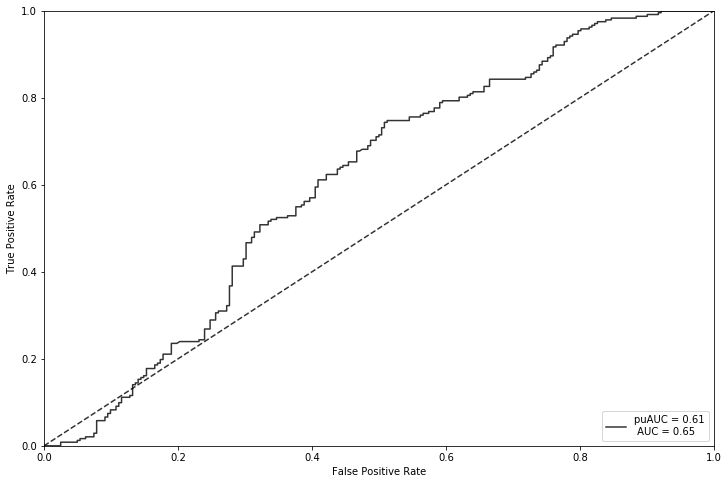

[0.24532736 0.1154425  0.1104347  0.07697281 0.07361575 0.06063533
 0.10043439 0.12472225 0.09241491]


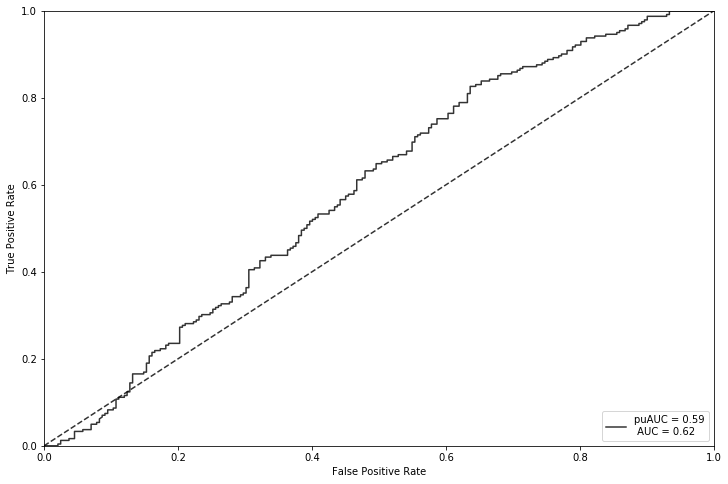

[0.22519252 0.1317943  0.07808788 0.10233568 0.07620123 0.06329487
 0.04679648 0.16190233 0.11439471]


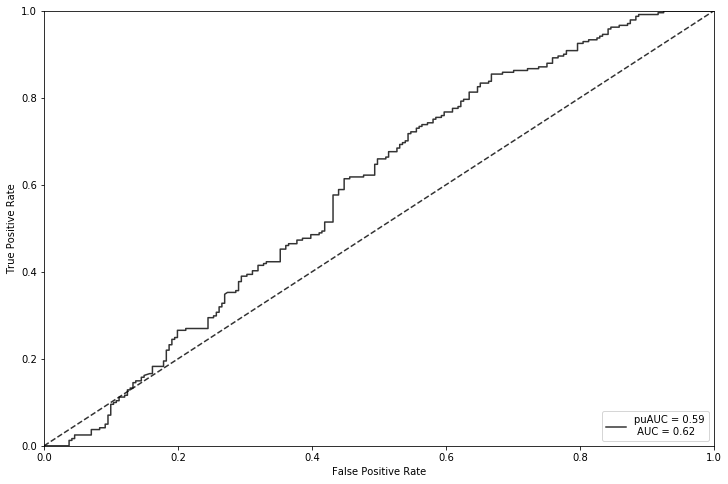

[0.11362853 0.17231862 0.1269796  0.13691502 0.07148013 0.07629932
 0.07533015 0.13077141 0.09627722]


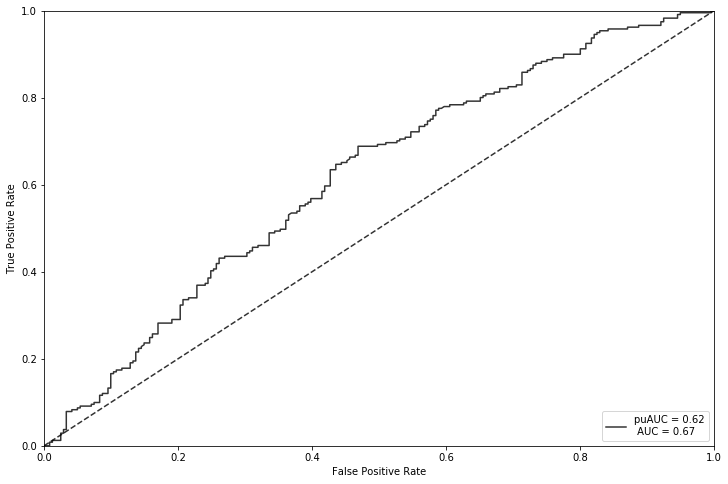

[0.23295444 0.105606   0.07866248 0.12929135 0.06099275 0.06322352
 0.07412    0.11242741 0.14272206]


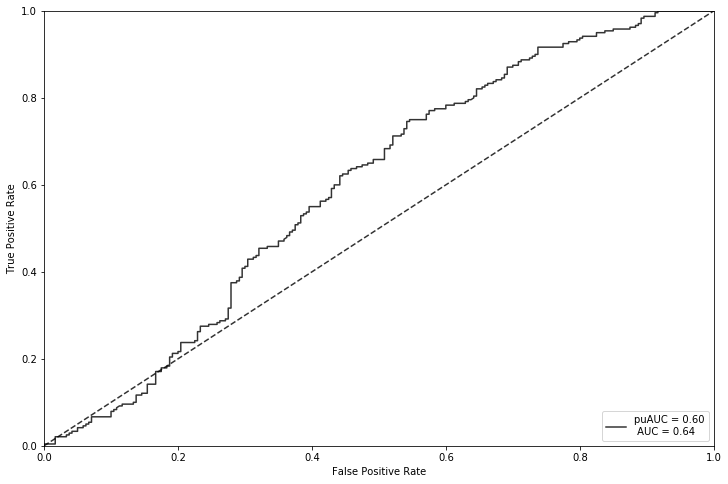

[0.27084109 0.08606947 0.11572843 0.12426381 0.08263492 0.05631449
 0.05660146 0.1158756  0.09167073]


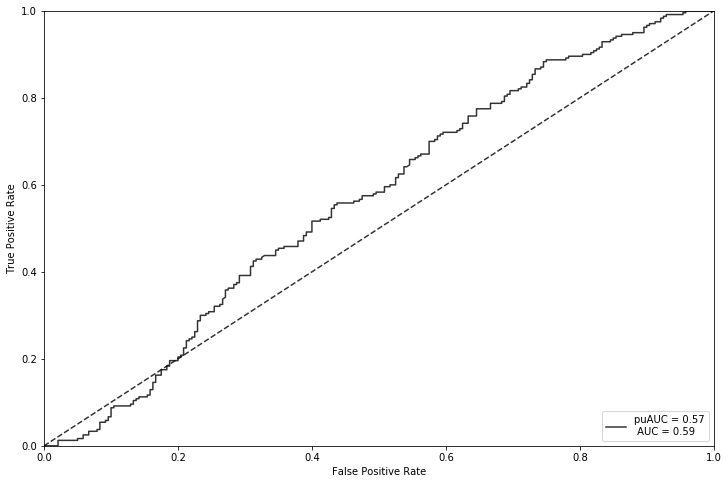

[0.14968876 0.19413006 0.09176022 0.13168427 0.06632341 0.06855396
 0.08166146 0.14292252 0.07327533]


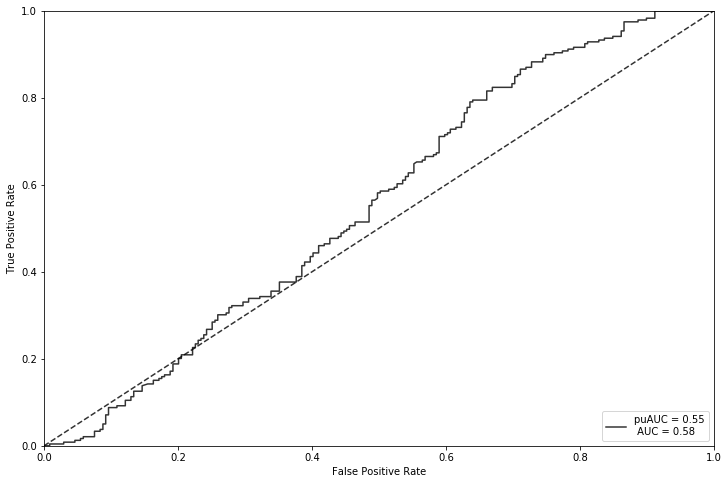

[0.16696576 0.11007702 0.08613264 0.16730629 0.07153691 0.06832694
 0.04190364 0.10325167 0.18449914]


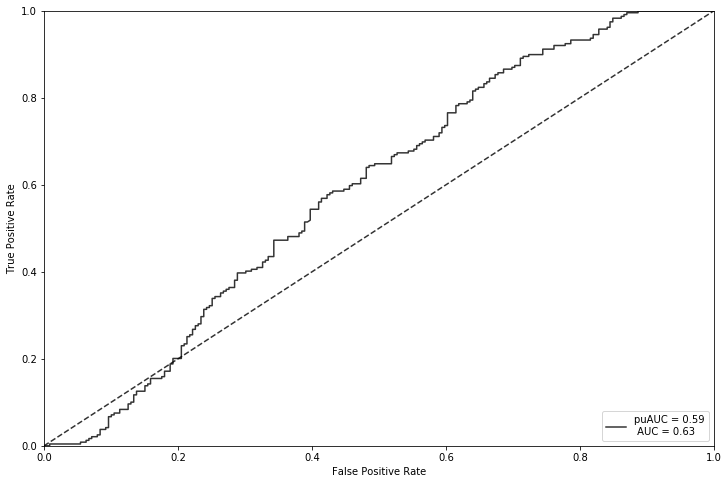

[0.20607096 0.13363273 0.08712564 0.14161632 0.07327346 0.07112737
 0.06905793 0.14419135 0.07390424]


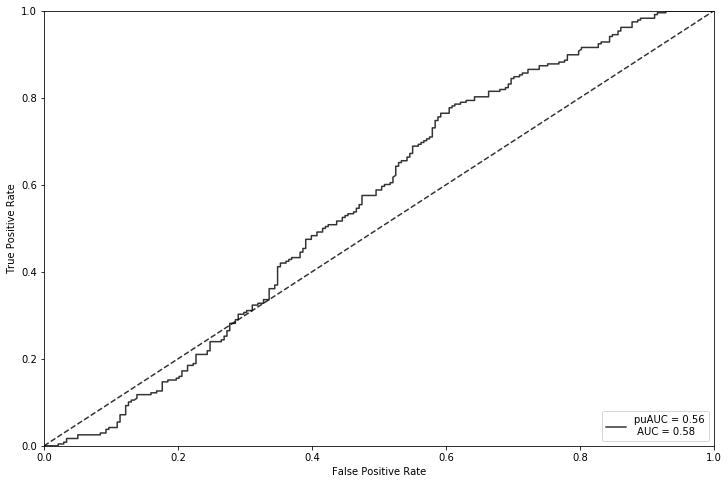

[0.16804931 0.15178478 0.08408679 0.13275347 0.04893929 0.05576221
 0.08546375 0.11096475 0.16219565]


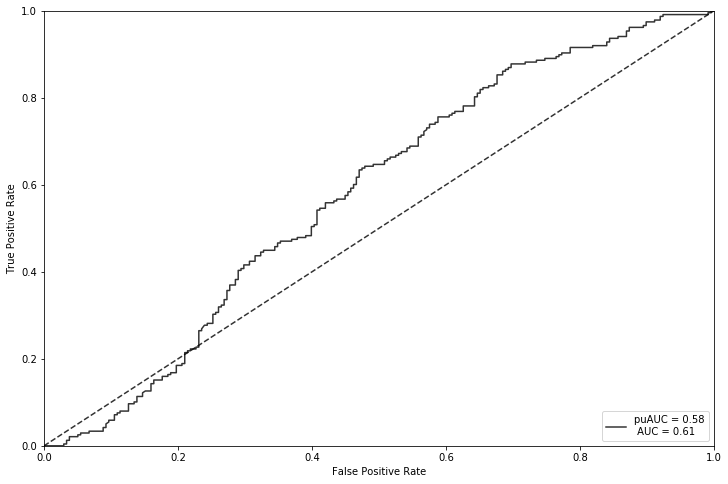

[0.20164646 0.11820065 0.12873231 0.09163812 0.07111758 0.05671706
 0.04599295 0.13743487 0.14852   ]


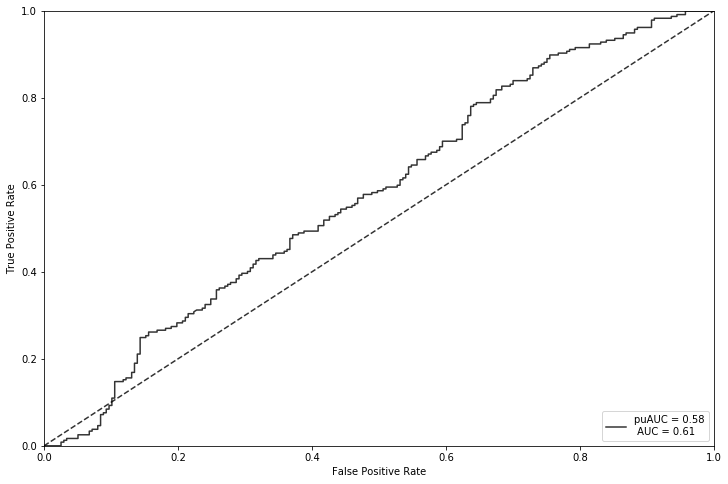

[0.18115138 0.12261771 0.08642155 0.13916672 0.06132081 0.09594253
 0.06794673 0.14606306 0.09936952]


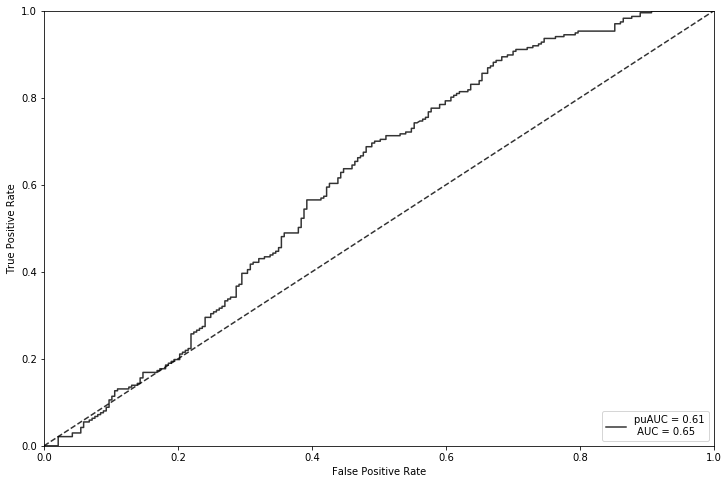

[0.17256928 0.19480463 0.09884193 0.0919733  0.05965715 0.0679446
 0.05713768 0.15306101 0.10401042]


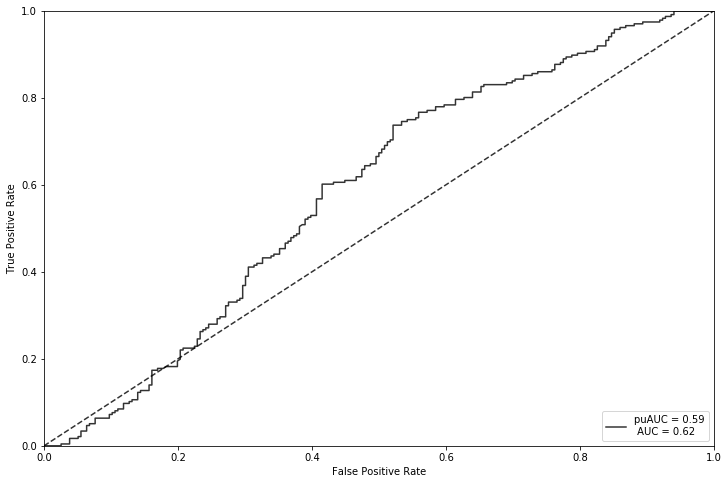

[0.20159591 0.1218811  0.10326333 0.10533601 0.0780029  0.07461618
 0.07730405 0.10534463 0.13265589]


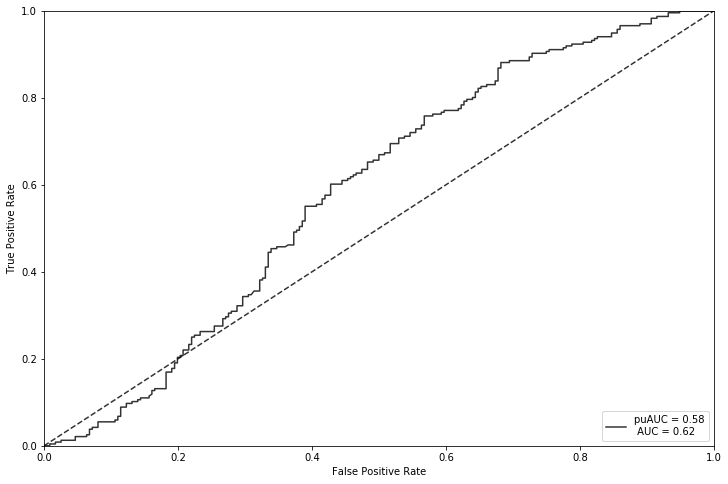

[0.15042818 0.15009453 0.10740614 0.09341282 0.08341007 0.07533588
 0.07915642 0.16091551 0.09984046]


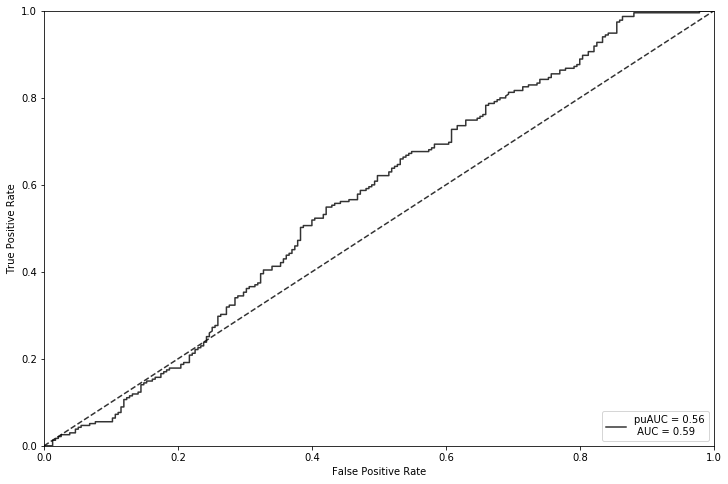

[0.17433628 0.13246384 0.15229243 0.13472766 0.07765603 0.06216364
 0.07511802 0.11934443 0.07189768]


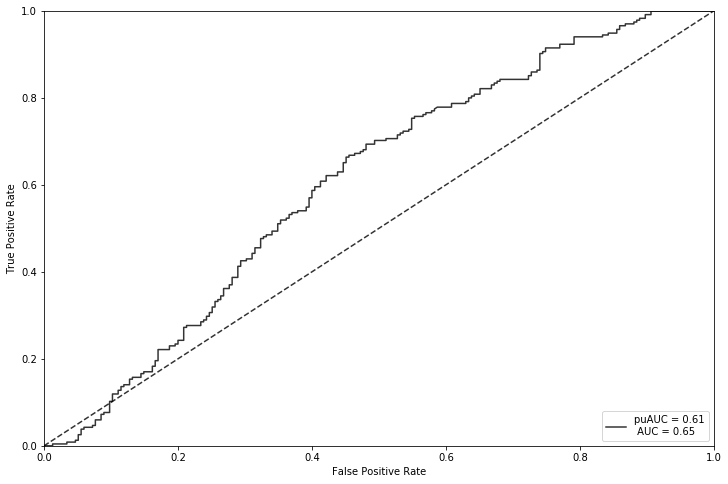

[0.14025946 0.08837352 0.08346811 0.0992061  0.14374981 0.11172502
 0.0872797  0.16168758 0.08425069]


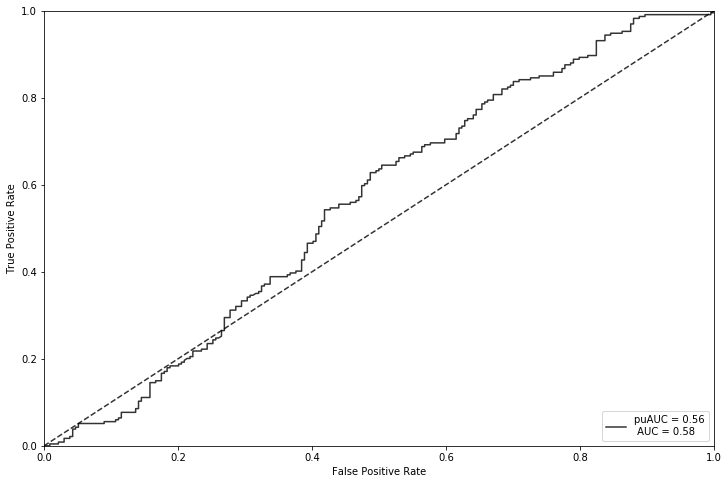

[0.2471356  0.06760989 0.12074953 0.12667881 0.06891976 0.04869224
 0.06507786 0.1454387  0.1096976 ]


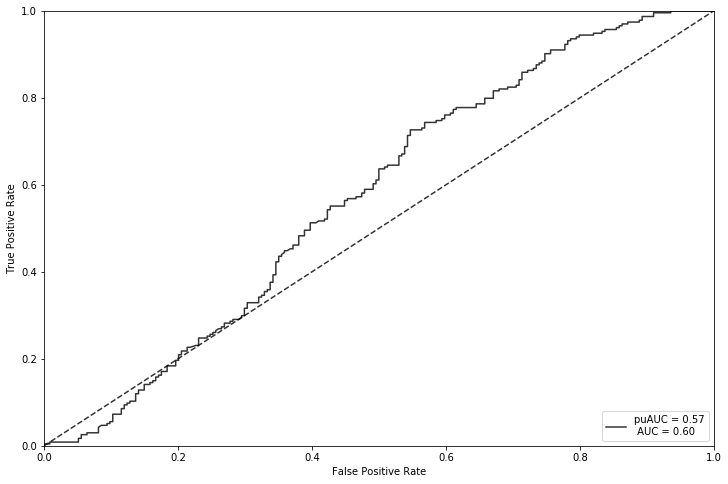

[0.17782465 0.11784146 0.11200444 0.1318155  0.06828215 0.05204379
 0.05458225 0.21492545 0.07068031]


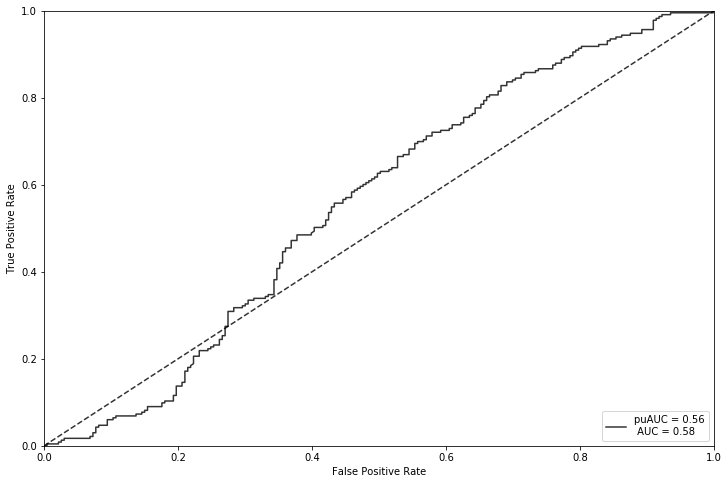

[0.17318772 0.10390587 0.08876601 0.15422589 0.08097078 0.062591
 0.08348911 0.16297357 0.08989004]


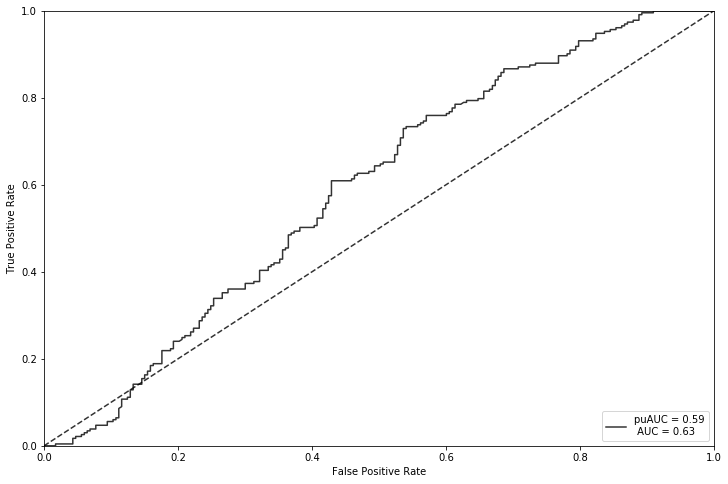

[0.17077596 0.13890342 0.10427822 0.12263403 0.06905546 0.0682107
 0.04610517 0.15869575 0.12134129]


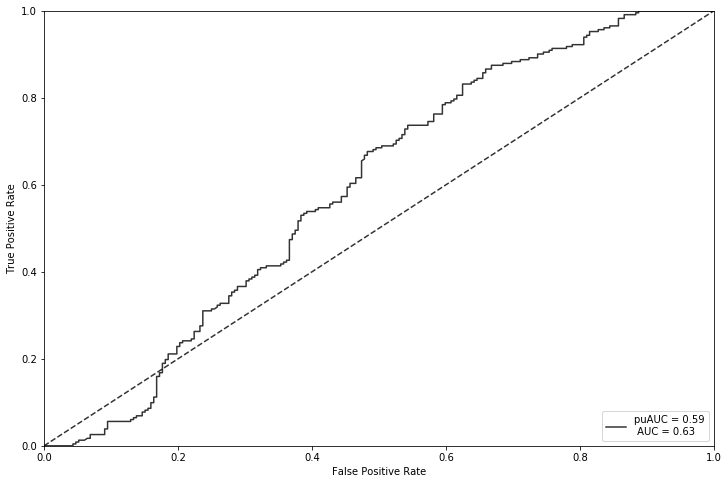

[0.1745533  0.14634859 0.10042856 0.08686593 0.08754565 0.07468209
 0.07472423 0.18900909 0.06584256]


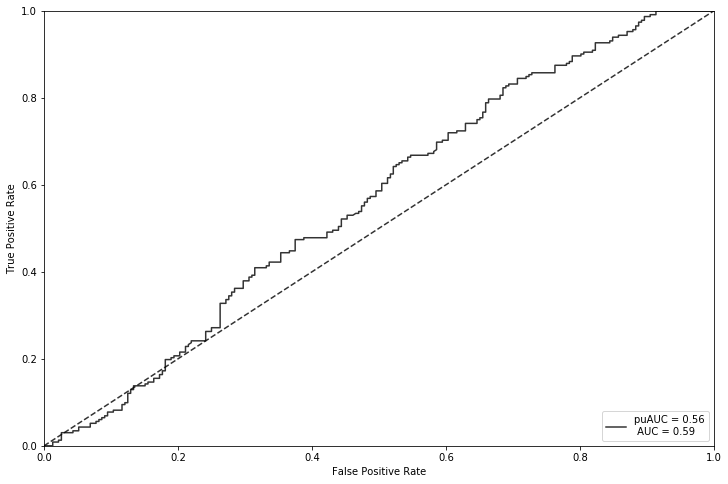

[0.1670159  0.11748416 0.10812111 0.14778827 0.06243915 0.06202468
 0.04606743 0.17894762 0.11011168]


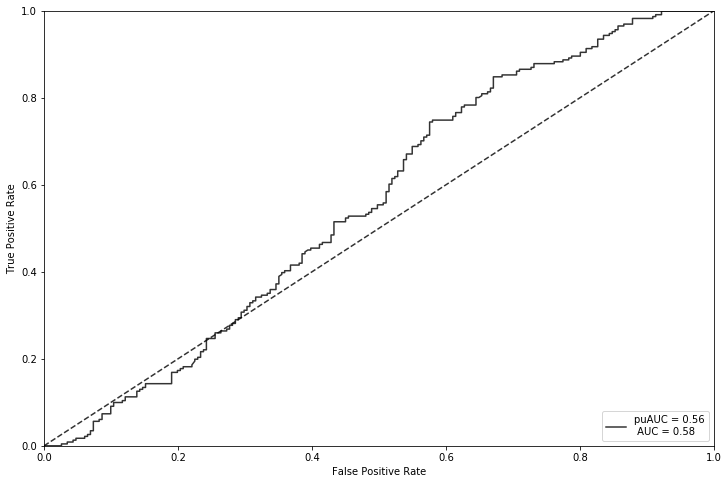

[0.14323523 0.15283793 0.09582228 0.12510184 0.06845966 0.07626446
 0.05634431 0.17820642 0.10372787]


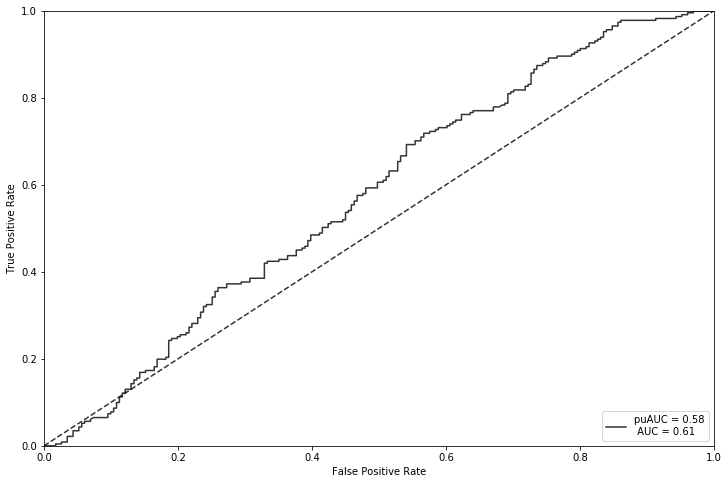

[0.16280008 0.09865291 0.10132144 0.10201898 0.06993208 0.0515739
 0.11254496 0.17000796 0.13114769]


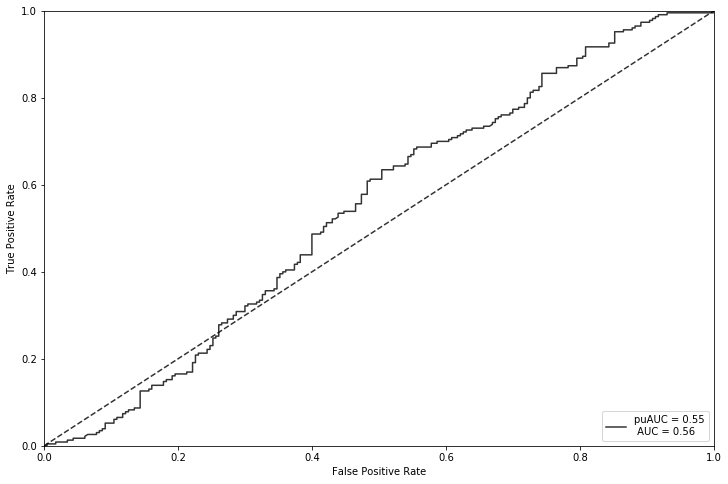

[0.26191842 0.09398978 0.07877639 0.11782382 0.06227421 0.05384555
 0.06213668 0.10801554 0.16121961]


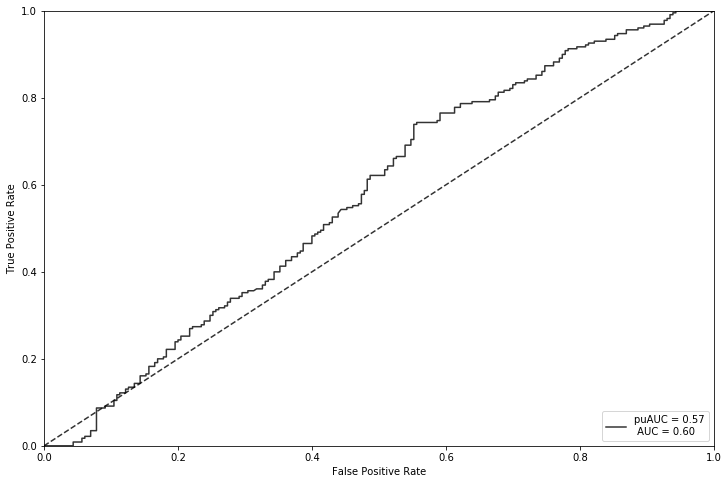

[0.16513676 0.14848345 0.14570774 0.11850692 0.06480252 0.07225956
 0.05943288 0.14204033 0.08362983]


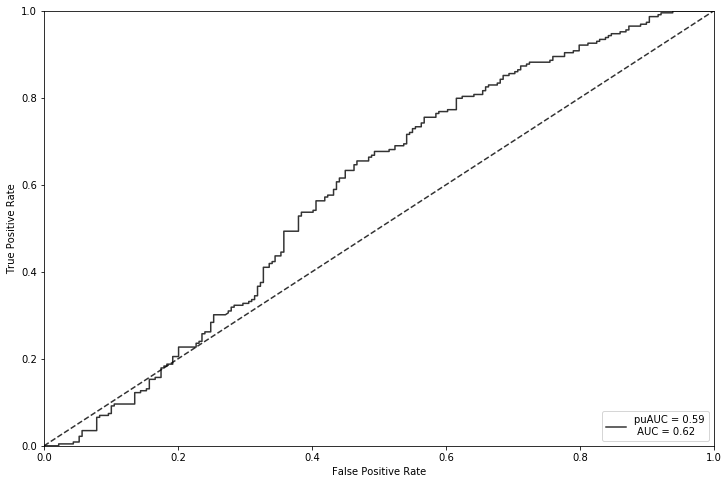

[0.17189379 0.14290809 0.11470394 0.09417309 0.05297277 0.05917244
 0.09421126 0.13586323 0.13410139]


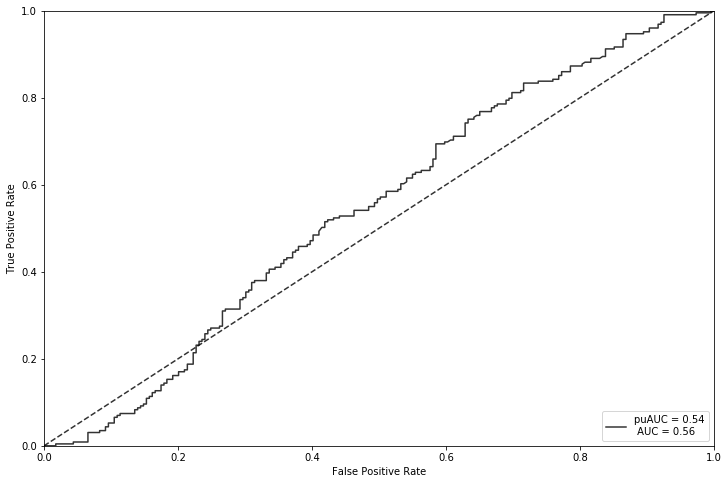

[0.18184692 0.14278558 0.0682985  0.11989649 0.06121371 0.0833466
 0.06090252 0.16918117 0.11252851]


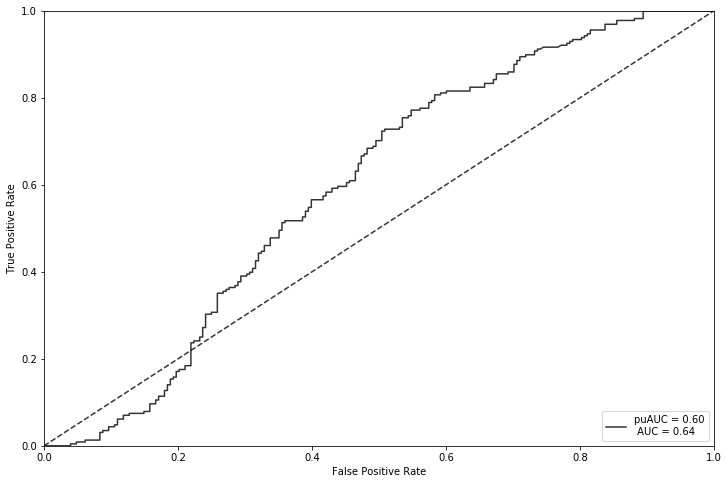

[0.18402897 0.11957609 0.09184863 0.13376728 0.05233075 0.06315071
 0.0538634  0.22766651 0.07376767]


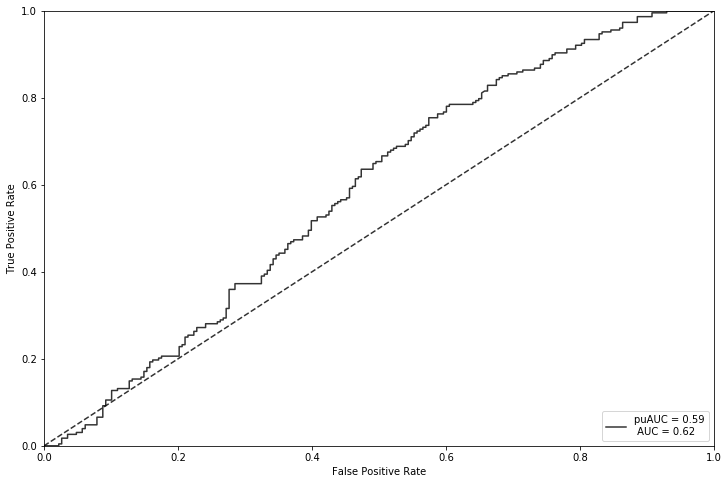

[0.18926908 0.11627373 0.08294904 0.10789077 0.06775787 0.05390178
 0.05590214 0.1682071  0.15784848]


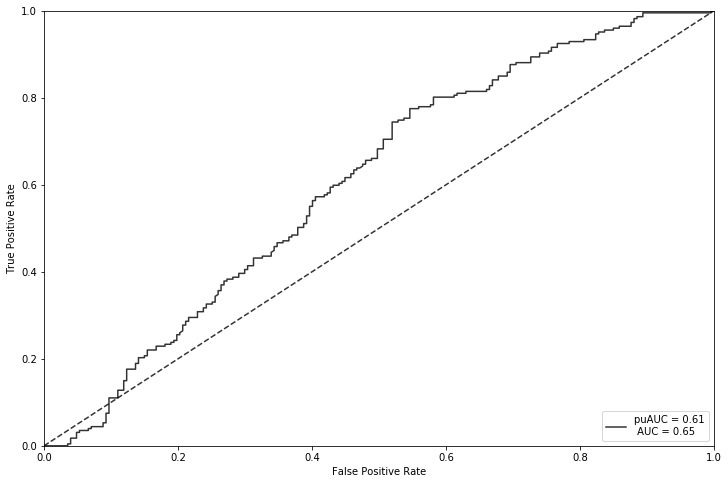

[0.13797229 0.09257431 0.11212097 0.10223149 0.07916724 0.07051026
 0.11621524 0.17744505 0.11176316]


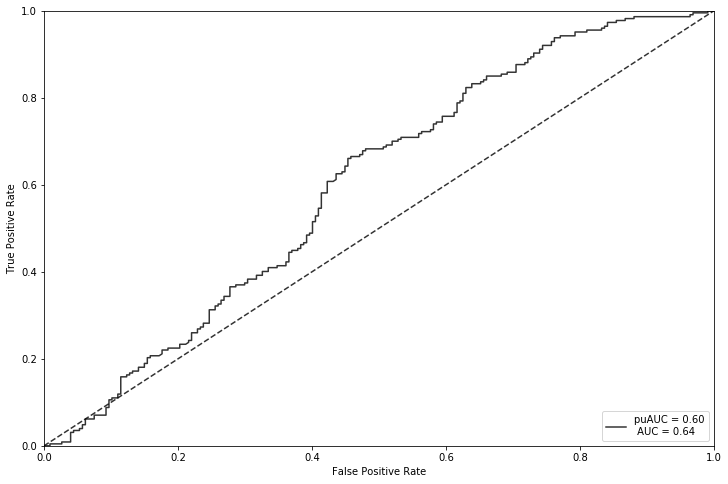

[0.11404097 0.09957213 0.16519342 0.17722852 0.07699418 0.0596441
 0.06006356 0.11654742 0.13071571]


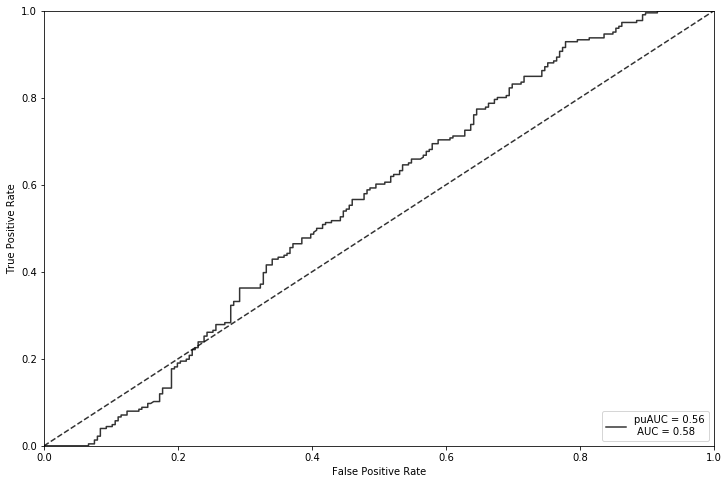

[0.168065   0.1141995  0.10981732 0.10373519 0.05780685 0.08477209
 0.09158817 0.17009519 0.09992069]


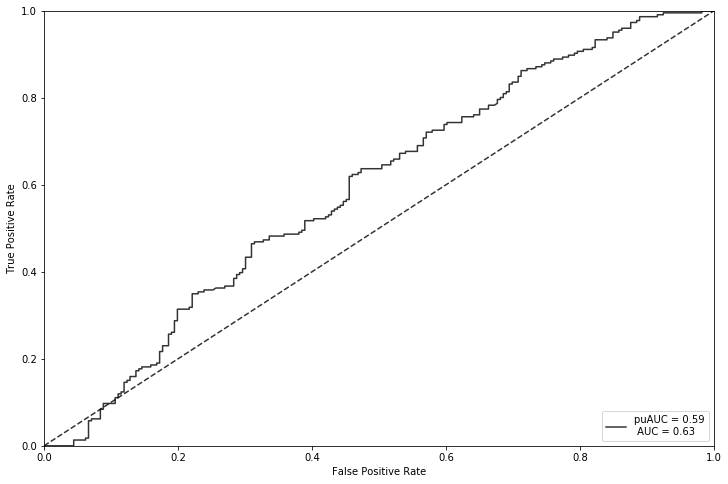

[0.19740817 0.0944093  0.07321597 0.13477187 0.10393448 0.07353334
 0.05438298 0.15163968 0.11670422]


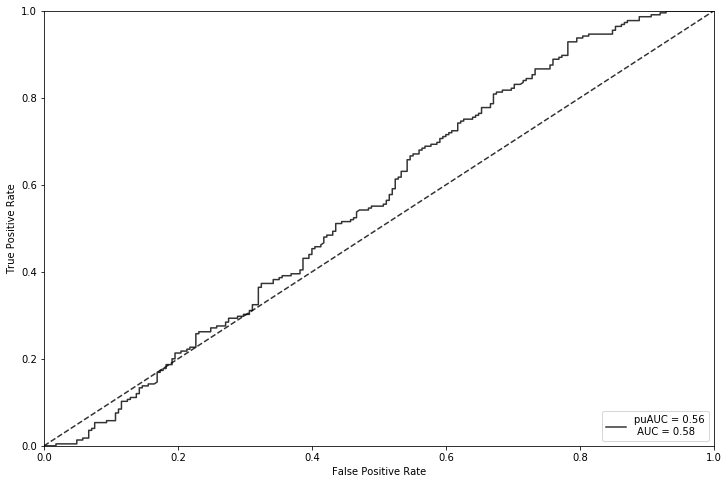

[0.12832589 0.21440272 0.10580046 0.13321784 0.07618475 0.08761993
 0.05017998 0.11331512 0.09095331]


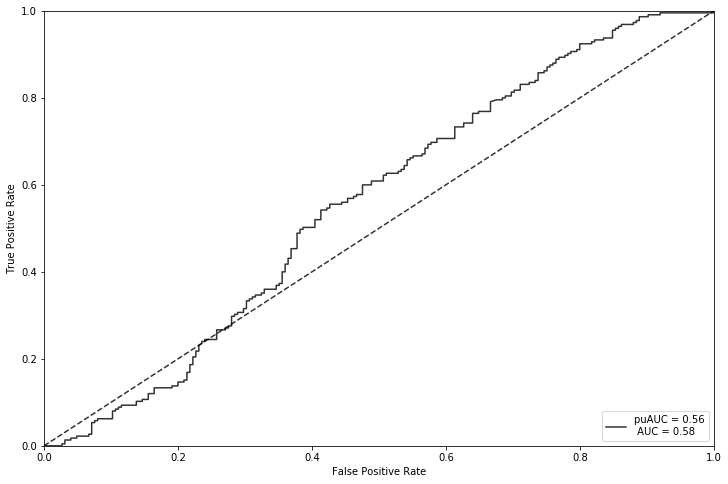

[0.14253998 0.12954653 0.10267654 0.14617884 0.07221906 0.06261871
 0.05519646 0.19492229 0.0941016 ]


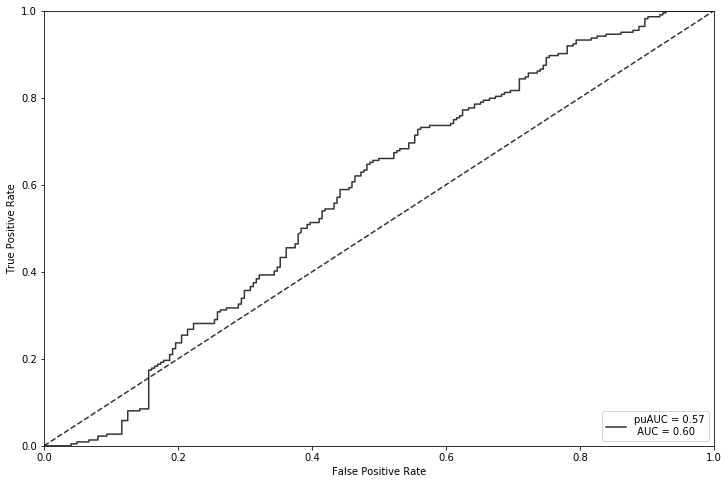

[0.14831155 0.08468582 0.11324723 0.08334219 0.0738999  0.07791069
 0.06979808 0.23085397 0.11795058]


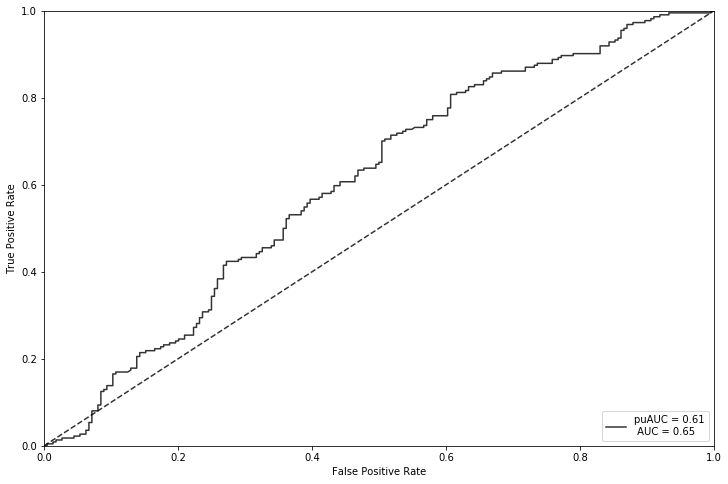

[0.15661945 0.10040947 0.14032765 0.11831465 0.06655165 0.06631434
 0.04905162 0.19578887 0.10662231]


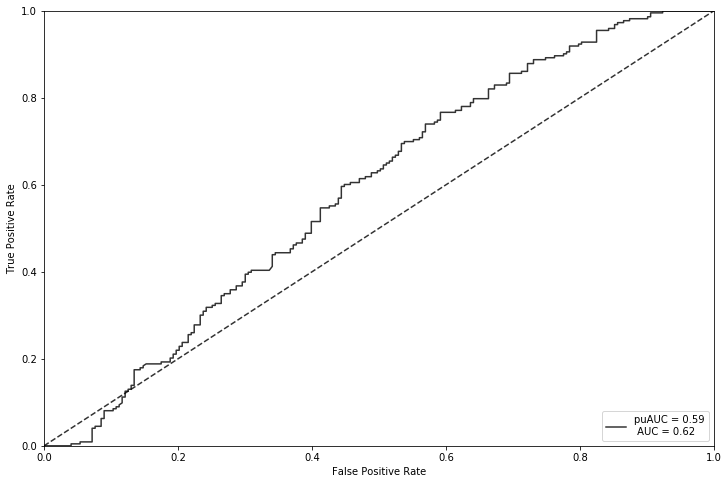

[0.12191621 0.12111644 0.1249519  0.11425396 0.06922184 0.07316461
 0.04966387 0.22132509 0.10438608]


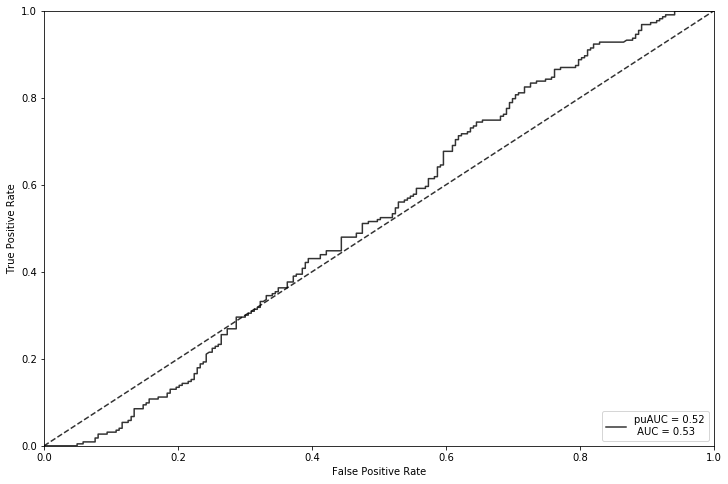

[0.19830727 0.18611151 0.11171368 0.0916909  0.0613518  0.0655854
 0.07480293 0.09376323 0.11667329]


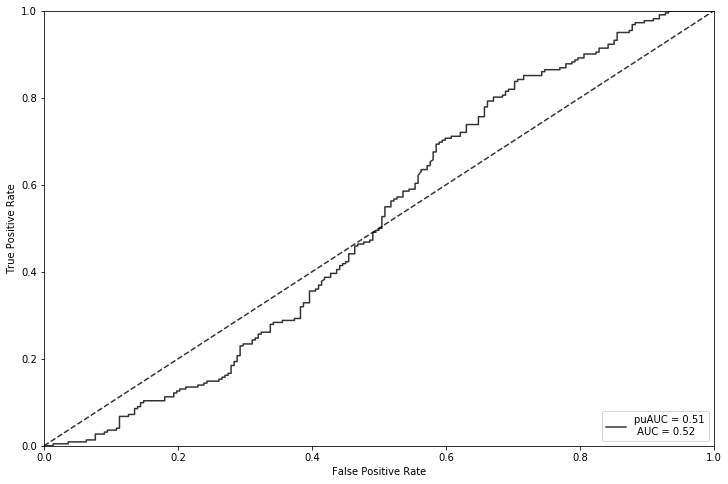

[0.20171492 0.08050257 0.10013284 0.10442094 0.07324345 0.05900751
 0.05078516 0.2316522  0.09854041]


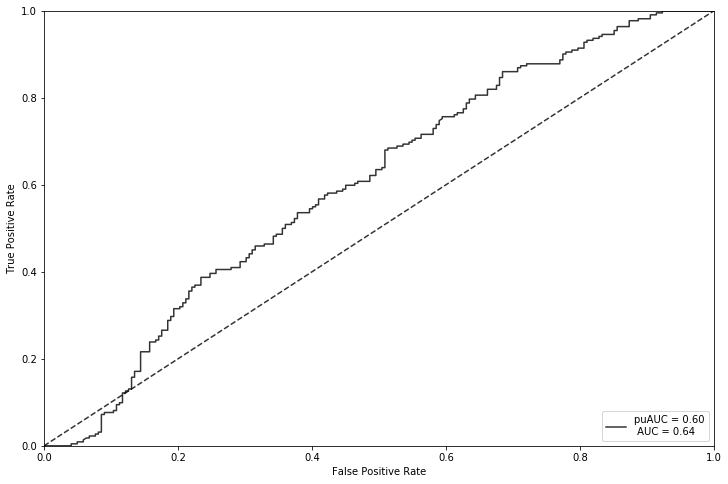

[0.22662002 0.10969286 0.10821136 0.18594915 0.07597467 0.07663261
 0.03721445 0.09180887 0.08789602]


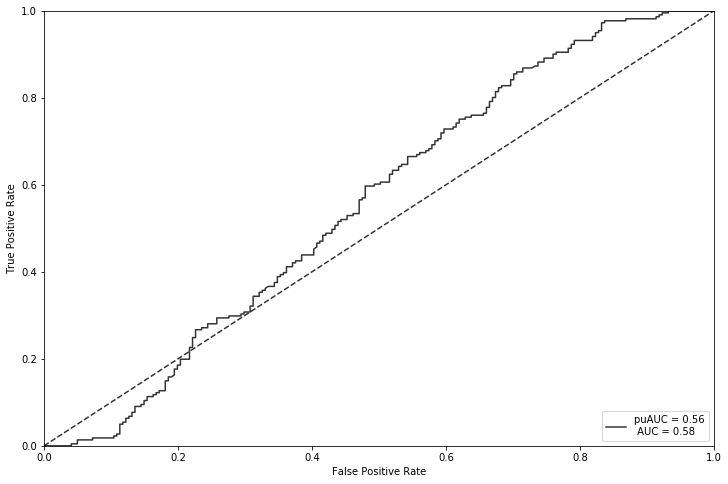

[0.18506112 0.11480625 0.10870102 0.10897354 0.04642798 0.07028892
 0.04225911 0.13334218 0.19013989]


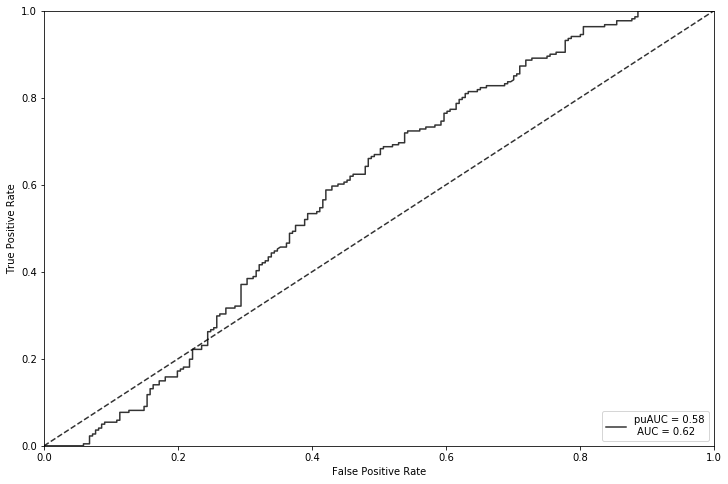

[0.1698952  0.11467563 0.17182089 0.15954489 0.05979102 0.09289805
 0.04659429 0.10167643 0.08310359]


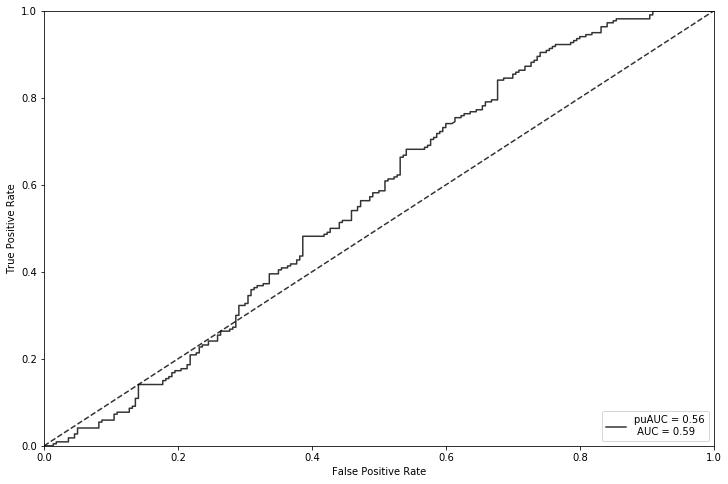

[0.2005861  0.15088322 0.08051962 0.07961108 0.10940385 0.05912468
 0.05571988 0.14732305 0.11682852]


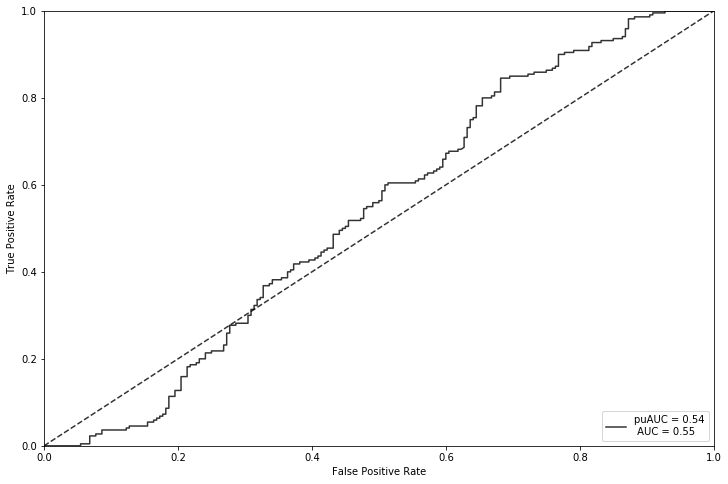

[0.19573518 0.14892098 0.09225787 0.06990438 0.08131244 0.08928273
 0.08953218 0.09839861 0.13465562]


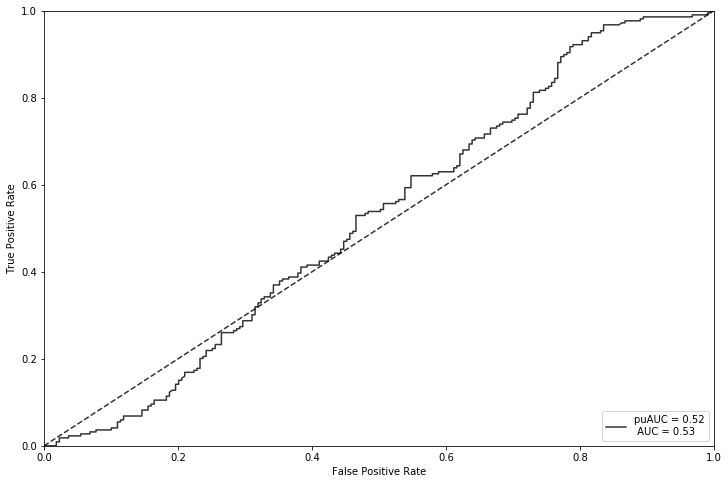

[0.19440162 0.08821023 0.15993514 0.10518163 0.06010627 0.04470101
 0.04991881 0.2030032  0.09454209]


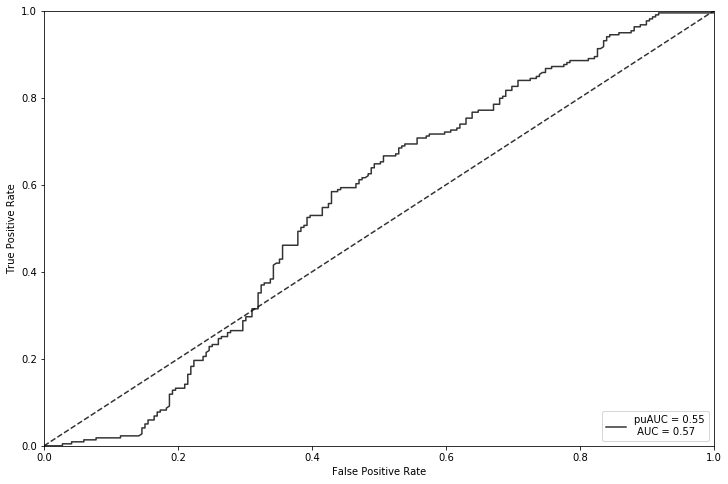

[0.15756629 0.12452113 0.1697661  0.11438714 0.09146963 0.08923989
 0.05111125 0.12197503 0.07996355]


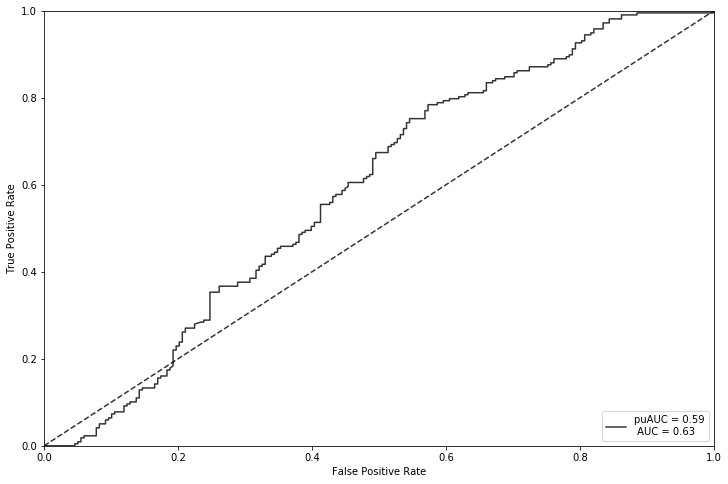

[0.24129769 0.17200641 0.12314181 0.086445   0.0647831  0.06124324
 0.06935634 0.10286285 0.07886357]


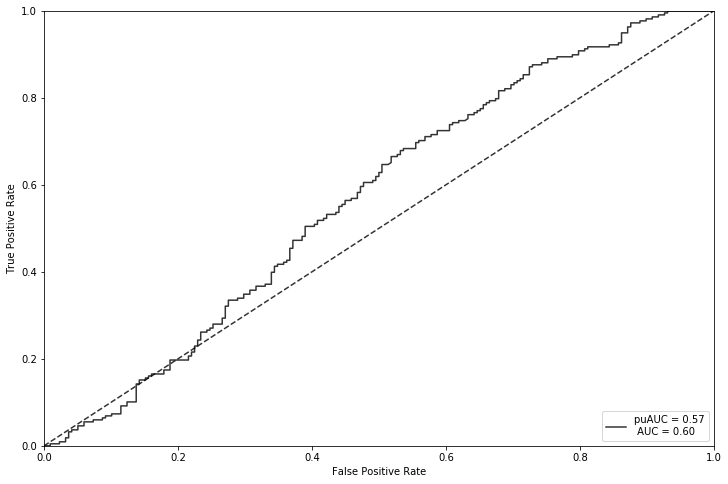

[0.120513   0.10686051 0.10618053 0.11806124 0.08344665 0.06644039
 0.09323555 0.1477946  0.15746754]


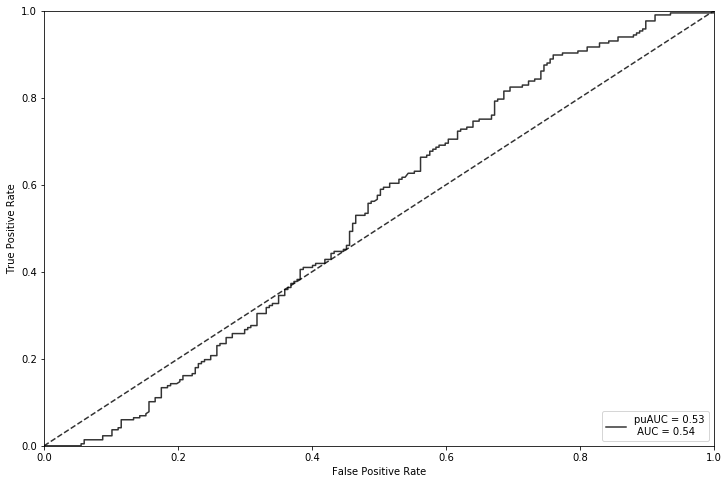

In [44]:
gbs = gbs_base.copy()

n = 579
iterations = 145
auroc = iterations*[0]

for ite in range(iterations):
    
    gbs = gbs.reindex(np.random.permutation(gbs.index))

    fst = int(n/2) #first half
    lst = n - fst  #second half

    df_1 = gbs.head(fst).copy()
    df_2 = gbs.tail(lst).copy()

    train = pd.concat([gesis.sample(n=lst), df_2])
    test = pd.concat([gesis.sample(n=fst), df_1])

    y = train.Umfrage
    X = train.drop(columns=['Umfrage'], axis=1).copy()
    clf = RandomForestClassifier(n_estimators=150, max_depth=4)
    clf.fit(X, y)
    print(clf.feature_importances_)

    y_test = test.Umfrage
    X_test = test.drop(columns=['Umfrage'], axis=1).copy()

    preds = [i[1] for i in clf.predict_proba(X_test)]
    auroc[ite] = roc(y_test, preds, ite/iterations, ite)
    
    rem = df_1.drop(columns = ['Umfrage'], axis=1)
    result = [i[1] for i in clf.predict_proba(rem)]
    
    if (gbs.index[np.argmax(result)] > 0.6):
        gbs = gbs.drop(gbs.index[np.argmax(result)]).copy()
        n = n-1
    else:
        print("Total number of iterations: " + str(579 - n))
        break
        
stats = gbs.describe()
stats = stats.round(2)
stats.to_csv(os.path.join(path, 'data/resultStats.csv'), encoding = "ISO-8859-1", index= False)

### Warning: To run the next code snippet without error, it is necessary to copy paste and rename one of the roc curves created to "roc.png". This was a fast workaround (can be fixed quite fast though).

In [45]:
from PIL import Image

for name in range(579 - n):
    
    img = Image.open(os.path.join(path, 'tex/fig/roc/'+str(name)+'.png'))
    img = img.convert("RGBA")
    
    datas = img.getdata()
    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    img.save(os.path.join(path, 'tex/fig/roc/'+str(name)+'.png'), "PNG")

for ite in range(579 - n):
    background = Image.open(os.path.join(path, 'tex/fig/roc/roc.png'))
    foreground = Image.open(os.path.join(path, 'tex/fig/roc/'+str(ite)+'.png'))
    Image.alpha_composite(background,foreground).save(os.path.join(path, 'tex/fig/roc/roc.png'))

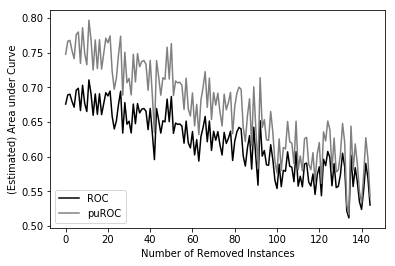

In [46]:
puRoc = []
for i in auroc:
    puRoc.append(puROC(i, 0.29))

plt.ylabel('(Estimated) Area under Curve')
plt.xlabel('Number of Removed Instances')
plt.plot(auroc[:(579 - n)], color='black', label = 'ROC')
plt.plot(puRoc[:(579 - n)], color='grey', label = 'puROC')
plt.legend(loc = 'lower left')

plt.savefig(os.path.join(path, 'tex/fig/roc/AUROC_drop.png'))
plt.show()